# Project 1: SAT & ACT Analysis

## Problem Statement

>SAT participation rates are behind ACT participation rates in the USA on a state level. Our department has been given funds to increase the participation rate and we need to know where best to invest the fund to increase our participation rates.

## Executive Summary

In this project, we seek to use SAT and ACT data to determine where to best use funds to increase SAT participation rates.<br/><br/>
Through our research, we have found the following:<br/>
1. There is a strong negative correlation between participation rates and test scores. However, this is likely due to the student demographic taking the tests and we cannot use this correlation to improve our participation rates.
2. There is a strong negative correlation between SAT and ACT participation rates. However, as we are unable to control ACT participation rates, we are unable to utilize this correlation to improve our participation rates.
3. There is a slight correlation between participation rates and whether the candidates have taken the PSATs before. We will be able to utilize this correlation with further study to ensure the PSAT's efficacy.<br/>

We conclude from our data analysis that only promoting the PSAT seems to be a viable use of funds based on the data. Aside from promoting the PSATs, the College Board should continue with its current efforts in pushing for statewide assessment contracts, promoting its 'SAT School Day' initiative, and provide value-added services to potential candidates.

-----------------------------------------------------------------------------------------------------------

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Final Data Dictionary
#### *not inclusive of appended data during EDA
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**s17_Participation**|int64|sat_2017|Participation rates for the 2017 SATs by state|
|**s17_English**|int64|sat_2017|English scores for the 2017 SATs by state|
|**s17_Math**|int64|sat_2017|Math scores for the 2017 SATs by state|
|**s17_Total**|int64|sat_2017|Total scores for the 2017 SATs by state|
|**a17_Participation**|int64|act_2017|Participation rates for the 2017 ACTs by state|
|**a17_English**|float64|act_2017|English scores for the 2017 ACTs by state|
|**a17_Math**|float64|act_2017|Math scores for the 2017 ACTs by state|
|**a17_Reading**|float64|act_2017|Reading scores for the 2017 ACTs by state|
|**a17_Science**|float64|act_2017|Science scores for the 2017 ACTs by state|
|**a17_Composite**|float64|act_2017|Composite scores for the 2017 ACTs by state|
|**s18_Participation**|int64|sat_2018|Participation rates for the 2018 SATs by state|
|**s18_English**|int64|sat_2018|English scores for the 2018 SATs by state|
|**s18_Math**|int64|sat_2018|Math scores for the 2018 SATs by state|
|**s18_Total**|int64|sat_2018|Total scores for the 2018 SATs by state|
|**a18_Participation**|int64|act_2018|Participation rates for the 2018 ACTs by state|
|**a18_English**|float64|act_2018|English scores for the 2018 ACTs by state|
|**a18_Math**|float64|act_2018|Math scores for the 2018 ACTs by state|
|**a18_Reading**|float64|act_2018|Reading scores for the 2018 ACTs by state|
|**a18_Science**|float64|act_2018|Science scores for the 2018 ACTs by state|
|**a18_Composite**|float64|act_2018|Composite scores for the 2018 ACTs by state|

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp
import os

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id="import"></a>

In [5]:
#import final for 2nd section
final=pd.read_csv(r'..\data\superfinal.csv',index_col='State')
final.tail()

,s17_Participation,s17_English,s17_Math,s17_Total,a17_Participation,a17_English,a17_Math,a17_Reading,a17_Science,a17_Composite,...,a18_Composite,a18_English,a18_Math,a18_Reading,a18_Science,p17_Participation,p17_English,p17_Math,p17_Total,s17_PSAT
State,,,,,,,,,,,,,,,,,,,,,
Virginia,65,561,541,1102,29,23.5,23.3,24.6,23.5,23.8,...,23.9,23.8,23.3,24.7,23.5,39,524.0,507.0,1031.0,87.0
Washington,64,541,534,1075,29,20.9,21.9,22.1,22.0,21.9,...,22.2,21.4,22.2,22.7,22.0,48,513.0,509.0,1022.0,80.0
West Virginia,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4,...,20.3,19.8,19.4,21.3,20.4,54,545.0,517.0,1062.0,56.0
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,...,20.5,19.8,20.3,20.6,20.8,69,545.0,533.0,1078.0,78.0
Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2,...,20.0,19.0,19.7,20.6,20.3,68,563.0,541.0,1104.0,78.0


<a id="convnum"></a>
link to [section on conversion](#convnum2)

In [7]:
#Function to convert any type to int or float
def conv_num(df,label,typ):
    try:
        df[label]=df[label].str.replace(r"[^0-9.]",'') #regex remove non-numeric and '.'
    except:
        pass
    if typ=='int':
        df[label]=df[label].apply(lambda x:int(x))
    elif typ=='float':
        df[label]=df[label].apply(lambda x:float(x))
    else:
        print('Please set 3rd arg as \'int\' or \'float\'.')
    return df    

<a id="prepend"></a>
link to [renaming section](#prepend2)

In [8]:
#Function to prepend a string to feature name
def prependtocol(df,string):
    df.columns = [string + str(col)for col in df.columns]
    return(df)

<a id=stdev></a>
link to [standard deviation section](#stdev2)

In [9]:
#STDDEV function to be applied to a dataframe feature
def stdev(df,label):
    m=df[label].mean()
    sumd=[]
    for i in df[label]:
        s=(i-m)**2
        sumd.append(s)
    std=np.sqrt(sum(sumd)/len(df[label]))
    return(std)

<a id=histo></a>
link to [histogram section](#histo2)

In [59]:
#Function to subplot histograms
def subplot_histograms(dataframe, list_of_columns, figsize=(10,10),list_of_titles=[], \
                       commonxlabel=None,commonylabel=None,list_of_xlabels=[], list_of_ylabels=[]):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=figsize) # Subplot with 2 columns per row
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        if len(list_of_columns)==len(list_of_titles): #only works if lists are of appropriate length
            ax[i].set_title(list_of_titles[i])
        if len(list_of_columns)==len(list_of_xlabels): #only works if lists are of appropriate length
            ax[i].set(xlabel=list_of_xlabels[i])
        if len(list_of_columns)==len(list_of_ylabels): #only works if lists are of appropriate length
            ax[i].set(ylabel=list_of_ylabels[i])
        if commonxlabel!=None: #if commonxlabel is present, this overwrites list_of_xlabels
            ax[i].set(xlabel=commonxlabel)
        if commonylabel!=None: #if commonylabel is present, this overwrites list_of_ylabels
            ax[i].set(ylabel=commonylabel)
            
        ax[i].hist(dataframe[column],bins=20)

<a id=scat></a>
link to [scatterplot section](#scat2)

In [11]:
# Scatterplot function that allows you to configure figuresize, title and labels
def scatplt(df,x,y,figsize=(5,5),title=None,xlabel=None,ylabel=None):
    fig, ax=plt.subplots(figsize=figsize)
    ax.set_title(title)
    sns.scatterplot(df[x],df[y],ax=ax)
    ax.set(xlabel=xlabel)
    ax.set(ylabel=ylabel)

<a id=box></a>
link to [boxplot section](#box2)

In [12]:
# boxplot function that allows you to specify figsize, columns, titles and labels
def boxplt(df,list_of_columns,figsize=(5,5),title=None,xlabel=None,ylabel=None):
    fig, ax=plt.subplots(figsize=figsize)
    ax.set_title(title)
    sns.boxplot(data=df[list_of_columns],ax=ax)
    ax.set(xlabel=xlabel)
    ax.set(ylabel=ylabel)

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#set folder path
dir=input('Please enter your data folder path:')
os.listdir(dir)
#for our purposes, please input '..\data', without quotes

Please enter your data folder path:..\data


['.ipynb_checkpoints',
 '2017 PSAT',
 '2018 sat',
 'act_2017.csv',
 'act_2017.xlsx',
 'act_2018.csv',
 'combined_2017.csv',
 'final.csv',
 'psat_2017.csv',
 'sat_2017.csv',
 'sat_2017.xlsx',
 'sat_2018.csv']

In [3]:
#check filename
os.path.basename(os.path.join( dir, "act_2017.csv" ))[:-4]

'act_2017'

In [29]:
#Code for creating dataframe:
for file in os.listdir(dir):
    if file.endswith('.csv'):
        holder=os.path.basename(os.path.join( dir, file ))[:-4]
        vars()[holder]=pd.read_csv(os.path.join( dir, file ))   #can use "..\ "to move up one dir level
        vars()[holder].set_index('State',inplace=True)
        print('dataframe created with name {0}.'.format(holder))

dataframe created with name act_2017.
dataframe created with name act_2018.
dataframe created with name combined_2017.
dataframe created with name final.
dataframe created with name sat_2017.
dataframe created with name sat_2018.


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code:
display(sat_2017.head(10))
display(act_2017.head(10))

,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,5%,593,572,1165
Alaska,38%,547,533,1080
Arizona,30%,563,553,1116
Arkansas,3%,614,594,1208
California,53%,531,524,1055
Colorado,11%,606,595,1201
Connecticut,100%,530,512,1041
Delaware,100%,503,492,996
District of Columbia,100%,482,468,950


,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,60%,20.3,20.7,21.4,21.0,21.0
Alabama,100%,18.9,18.4,19.7,19.4,19.2
Alaska,65%,18.7,19.8,20.4,19.9,19.8
Arizona,62%,18.6,19.8,20.1,19.8,19.7
Arkansas,100%,18.9,19.0,19.7,19.5,19.4
California,31%,22.5,22.7,23.1,22.2,22.8
Colorado,100%,20.1,20.3,21.2,20.9,20.8
Connecticut,31%,25.5,24.6,25.6,24.6,25.2
Delaware,18%,24.1,23.4,24.8,23.6,24.1


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
>For our SAT dataframe, we are given 4 features indexed by state. The 4 features are 'Participation' (rate), 'Evidence-Based Reading and Writing' (scores, henceforth shortened to 'EBRW'), 'Math' (scores), and 'Total' (scores).<br/><br/>
Participation values range from 2 to 100%. EBRW values range from 482 to 644. Math scores range from **52** to 651, and Total scores range from 950 to 1295.<br/><br/>
For our ACT dataframe, we are given 6 features indexed by state. The 6 features are 'Participation' (rate), 'English' (scores), 'Math' (scores), 'Reading' (scores), and 'Science' (scores).<br/><br/>
Participation values range from 8 to 100%. English scores range from 16.3 to 25.5. Math scores range from 18 to 25.3. Reading scores range from 18.1 to 26. Reading scores range from 2.3 to 24.9. Science scores range from 17.8 to 25.5.

#### 4a. Does the data look complete? 

Answer:
>The data looks complete, except for the 'National' row which is present in the ACT data but not the SAT data.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:
>SAT **adjusted** scores range from 200 to 800 per subject, with a possible total score from 400 to 1600.<br/><br/>
ACT scores for both subjects and composite range from 1 to 36.<br/><br/>
SAT score data from its [wikipedia](https://en.wikipedia.org/wiki/SAT). ACT score data from the [princeton review](https://www.princetonreview.com/college-advice/good-act-scores)<br/><br/>
The SAT data has a questionable value for Maryland's Math score, where the value is 52 though the minimum possible value is 200. The ACT data has questionable data for Maryland's Science score, where the value of 2.3 is much lower to all the other minimum values for other subjects. Wyoming's Composite score value is also given as 20.2x which is intepreted as a string rather than a numeric value and thus we have to fix this datapoint as well.  

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [37]:
#Replacing faulty data with original from source
sat_2017.at['Maryland','Math']=524
act_2017.at['Maryland','Science']=23.2
act_2017.at['Wyoming','Composite']=20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [34]:
#code
display(sat_2017.dtypes)
display(act_2017.dtypes)

Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
>Participation, though given as a percentage, should not be identified as objects and we have to convert it to numeric form for analysis purposes.<br/><br/>
ACT composite score data should also be numeric rather than object type, and we can identify that Wyoming's composite score is the culprit that was interpreted as a string.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

<a id='convnum2'></a>
link to [function](#convnum)

In [9]:
#test for conv_num function
test=act_2017.copy()

display(test.head())

conv_num(test,'Composite','float')

display(test.tail())
test.info()

,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,60%,20.3,20.7,21.4,21.0,21.0
Alabama,100%,18.9,18.4,19.7,19.4,19.2
Alaska,65%,18.7,19.8,20.4,19.9,19.8
Arizona,62%,18.6,19.8,20.1,19.8,19.7
Arkansas,100%,18.9,19.0,19.7,19.5,19.4


,Participation,English,Math,Reading,Science,Composite
State,,,,,,
Virginia,29%,23.5,23.3,24.6,23.5,23.8
Washington,29%,20.9,21.9,22.1,22.0,21.9
West Virginia,69%,20.0,19.4,21.2,20.5,20.4
Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
Wyoming,100%,19.4,19.8,20.8,20.6,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        51 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


- Fix any individual values preventing other columns from being the appropriate type.

In [41]:
#Convert incorrect feature types
conv_num(sat_2017,'Participation','int')
conv_num(act_2017,'Participation','int')
conv_num(act_2017,'Composite','float')

,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,60,20.3,20.7,21.4,21.0,21.0
Alabama,100,18.9,18.4,19.7,19.4,19.2
Alaska,65,18.7,19.8,20.4,19.9,19.8
Arizona,62,18.6,19.8,20.1,19.8,19.7
Arkansas,100,18.9,19.0,19.7,19.5,19.4
California,31,22.5,22.7,23.1,22.2,22.8
Colorado,100,20.1,20.3,21.2,20.9,20.8
Connecticut,31,25.5,24.6,25.6,24.6,25.2
Delaware,18,24.1,23.4,24.8,23.6,24.1


- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
#code
display(sat_2017)
display(act_2017)

,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,5,593,572,1165
Alaska,38,547,533,1080
Arizona,30,563,553,1116
Arkansas,3,614,594,1208
California,53,531,524,1055
Colorado,11,606,595,1201
Connecticut,100,530,512,1041
Delaware,100,503,492,996
District of Columbia,100,482,468,950


,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,60,20.3,20.7,21.4,21.0,21.0
Alabama,100,18.9,18.4,19.7,19.4,19.2
Alaska,65,18.7,19.8,20.4,19.9,19.8
Arizona,62,18.6,19.8,20.1,19.8,19.7
Arkansas,100,18.9,19.0,19.7,19.5,19.4
California,31,22.5,22.7,23.1,22.2,22.8
Colorado,100,20.1,20.3,21.2,20.9,20.8
Connecticut,31,25.5,24.6,25.6,24.6,25.2
Delaware,18,24.1,23.4,24.8,23.6,24.1


- Display the data types again to confirm they are correct.

In [12]:
#Code:
sat_2017.info()
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4)
memory usage: 4.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        51 non-null float64
dtypes: float64(5), int64(1)
memory usage: 5.3+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

<a id='prepend2'></a>
link to [function](#prepend)

In [14]:
#test for prependtocol function
test=sat_2017.copy()
prependtocol(test,'s17_')

,s17_Participation,s17_Evidence-Based Reading and Writing,s17_Math,s17_Total
State,,,,
Alabama,5,593,572,1165
Alaska,38,547,533,1080
Arizona,30,563,553,1116
Arkansas,3,614,594,1208
California,53,531,524,1055
Colorado,11,606,595,1201
Connecticut,100,530,512,1041
Delaware,100,503,492,996
District of Columbia,100,482,468,950


In [43]:
#renaming all features in dataframes
prependtocol(sat_2017,'s17_')
prependtocol(act_2017,'a17_')

,a17_Participation,a17_English,a17_Math,a17_Reading,a17_Science,a17_Composite
State,,,,,,
National,60,20.3,20.7,21.4,21.0,21.0
Alabama,100,18.9,18.4,19.7,19.4,19.2
Alaska,65,18.7,19.8,20.4,19.9,19.8
Arizona,62,18.6,19.8,20.1,19.8,19.7
Arkansas,100,18.9,19.0,19.7,19.5,19.4
California,31,22.5,22.7,23.1,22.2,22.8
Colorado,100,20.1,20.3,21.2,20.9,20.8
Connecticut,31,25.5,24.6,25.6,24.6,25.2
Delaware,18,24.1,23.4,24.8,23.6,24.1


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


Link to the [Final data dictionary](#Final-Data-Dictionary)

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [44]:
#Drop unwanted 'National' row from act_2017
act_2017.drop('National',inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [46]:
#Merge 2017 dataframes by left and right inner join:
df17=pd.merge(sat_2017,act_2017,left_index=True,right_index=True)
df17.info()
display(df17.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
s17_Participation                         51 non-null int64
s17_Evidence-Based Reading and Writing    51 non-null int64
s17_Math                                  51 non-null int64
s17_Total                                 51 non-null int64
a17_Participation                         51 non-null int64
a17_English                               51 non-null float64
a17_Math                                  51 non-null float64
a17_Reading                               51 non-null float64
a17_Science                               51 non-null float64
a17_Composite                             51 non-null float64
dtypes: float64(5), int64(5)
memory usage: 6.9+ KB


,s17_Participation,s17_Evidence-Based Reading and Writing,s17_Math,s17_Total,a17_Participation,a17_English,a17_Math,a17_Reading,a17_Science,a17_Composite
State,,,,,,,,,,
Virginia,65,561,541,1102,29,23.5,23.3,24.6,23.5,23.8
Washington,64,541,534,1075,29,20.9,21.9,22.1,22.0,21.9
West Virginia,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5
Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [47]:
#Export 2017 dataframe to csv
df17.to_csv('..\data\combined_2017.csv') #change filepath if required

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
sat_2018.info()
act_2018.info()
display(sat_2018.head())
display(sat_2018.tail())
display(act_2018.head())
display(act_2018.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to National
Data columns (total 6 columns):
Participation    52 non-null int64
Composite        52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.8+ KB


,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,6.0,595.0,571.0,1166.0
Alaska,43.0,562.0,544.0,1106.0
Arizona,29.0,577.0,572.0,1149.0
Arkansas,5.0,592.0,576.0,1169.0
California,60.0,540.0,536.0,1076.0


,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Virginia,68.0,567.0,550.0,1117.0
Washington,69.0,543.0,538.0,1081.0
WestVirginia,28.0,513.0,486.0,999.0
Wisconsin,3.0,641.0,653.0,1294.0
Wyoming,3.0,633.0,625.0,1257.0


,Participation,Composite,English,Math,Reading,Science
State,,,,,,
Alabama,100,19.1,18.9,18.3,19.6,19.0
Alaska,33,20.8,19.8,20.6,21.6,20.7
Arizona,66,19.2,18.2,19.4,19.5,19.2
Arkansas,100,19.4,19.1,18.9,19.7,19.4
California,27,22.7,22.5,22.5,23.0,22.1


,Participation,Composite,English,Math,Reading,Science
State,,,,,,
Washington,24,22.2,21.4,22.2,22.7,22.0
West Virginia,65,20.3,19.8,19.4,21.3,20.4
Wisconsin,100,20.5,19.8,20.3,20.6,20.8
Wyoming,100,20.0,19.0,19.7,20.6,20.3
National,55,20.8,20.2,20.5,21.3,20.7


In [48]:
#Removing unwanted 'National' feature from act_2018
act_2018.drop('National',inplace=True)
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 6 columns):
Participation    51 non-null int64
Composite        51 non-null float64
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.8+ KB


In [49]:
#Convert sat_2018 features to appropriate datatypes
conv_num(sat_2018,'Participation','int')
conv_num(sat_2018,'Evidence-Based Reading and Writing','int')
conv_num(sat_2018,'Math','int')
conv_num(sat_2018,'Total','int')

,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,6,595,571,1166
Alaska,43,562,544,1106
Arizona,29,577,572,1149
Arkansas,5,592,576,1169
California,60,540,536,1076
Colorado,100,519,506,1025
Connecticut,100,535,519,1053
Delaware,100,505,492,998
DistrictofColumbia,92,497,480,977


In [50]:
#Rename 2018 dataframe features appropriately
prependtocol(sat_2018,'s18_')
prependtocol(act_2018,'a18_')

,a18_Participation,a18_Composite,a18_English,a18_Math,a18_Reading,a18_Science
State,,,,,,
Alabama,100,19.1,18.9,18.3,19.6,19.0
Alaska,33,20.8,19.8,20.6,21.6,20.7
Arizona,66,19.2,18.2,19.4,19.5,19.2
Arkansas,100,19.4,19.1,18.9,19.7,19.4
California,27,22.7,22.5,22.5,23.0,22.1
Colorado,30,23.9,23.9,23.2,24.4,23.5
Connecticut,26,25.6,26.0,24.8,26.1,24.9
Delaware,17,23.2,23.7,23.1,24.5,23.4
District of Columbia,32,23.6,23.7,22.7,24.4,23.0


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [51]:
#Set sat_2017 index as sat_2018 index as sat_2018 index is missing spaces
#This will allow for a proper merge of all dataframes
a=df17.index
sat_2018.set_index(a,inplace=True)
sat_2018.tail()

,s18_Participation,s18_Evidence-Based Reading and Writing,s18_Math,s18_Total
State,,,,
Virginia,68,567,550,1117
Washington,69,543,538,1081
West Virginia,28,513,486,999
Wisconsin,3,641,653,1294
Wyoming,3,633,625,1257


In [52]:
#Merge all 2018 dataframes
df18=pd.merge(sat_2018,act_2018,left_index=True,right_index=True)
df18.info()
display(df18.head())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
s18_Participation                         51 non-null int64
s18_Evidence-Based Reading and Writing    51 non-null int64
s18_Math                                  51 non-null int64
s18_Total                                 51 non-null int64
a18_Participation                         51 non-null int64
a18_Composite                             51 non-null float64
a18_English                               51 non-null float64
a18_Math                                  51 non-null float64
a18_Reading                               51 non-null float64
a18_Science                               51 non-null float64
dtypes: float64(5), int64(5)
memory usage: 6.9+ KB


,s18_Participation,s18_Evidence-Based Reading and Writing,s18_Math,s18_Total,a18_Participation,a18_Composite,a18_English,a18_Math,a18_Reading,a18_Science
State,,,,,,,,,,
Alabama,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
Alaska,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
Arizona,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
Arkansas,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
California,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [53]:
#Merge all dataframes into 'final'
final=pd.merge(df17,df18,left_index=True,right_index=True)
final.info()
display(final.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
s17_Participation                         51 non-null int64
s17_Evidence-Based Reading and Writing    51 non-null int64
s17_Math                                  51 non-null int64
s17_Total                                 51 non-null int64
a17_Participation                         51 non-null int64
a17_English                               51 non-null float64
a17_Math                                  51 non-null float64
a17_Reading                               51 non-null float64
a17_Science                               51 non-null float64
a17_Composite                             51 non-null float64
s18_Participation                         51 non-null int64
s18_Evidence-Based Reading and Writing    51 non-null int64
s18_Math                                  51 non-null int64
s18_Total                                 51 non-null int64
a18_Participation                        

,s17_Participation,s17_Evidence-Based Reading and Writing,s17_Math,s17_Total,a17_Participation,a17_English,a17_Math,a17_Reading,a17_Science,a17_Composite,s18_Participation,s18_Evidence-Based Reading and Writing,s18_Math,s18_Total,a18_Participation,a18_Composite,a18_English,a18_Math,a18_Reading,a18_Science
State,,,,,,,,,,,,,,,,,,,,
Virginia,65,561,541,1102,29,23.5,23.3,24.6,23.5,23.8,68,567,550,1117,24,23.9,23.8,23.3,24.7,23.5
Washington,64,541,534,1075,29,20.9,21.9,22.1,22.0,21.9,69,543,538,1081,24,22.2,21.4,22.2,22.7,22.0
West Virginia,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4,28,513,486,999,65,20.3,19.8,19.4,21.3,20.4
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,100,20.5,19.8,20.3,20.6,20.8
Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2,3,633,625,1257,100,20.0,19.0,19.7,20.6,20.3


In [19]:
#Rename SAT EBRW features to English for simplicity
final.rename(index=str,columns={'s17_Evidence-Based Reading and Writing':'s17_English','s18_Evidence-Based Reading and Writing':'s18_English'},inplace=True)
final.head()

,s17_Participation,s17_English,s17_Math,s17_Total,a17_Participation,a17_English,a17_Math,a17_Reading,a17_Science,a17_Composite,s18_Participation,s18_English,s18_Math,s18_Total,a18_Participation,a18_Composite,a18_English,a18_Math,a18_Reading,a18_Science
State,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [22]:
#Output 'final' dataframe as csv
final.to_csv(os.path.join( dir, 'final.csv' )) #Change filepath if required

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [23]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
s17_Participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
s17_Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
s17_Math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
s17_Total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
a17_Participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
a17_English,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
a17_Math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
a17_Reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
a17_Science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
a17_Composite,50.0,21.546000,2.032311,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

<a id='stdev2'></a>
link to [function](#stdev)

In [18]:
#stdev function test
stdev(final,'s17_Math')

46.65713364485503

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [58]:
#Calculate stddev for all features in 'final':
sd={i:stdev(final,i) for i in final}
sd

{'s17_Participation': 34.92907076664508,
 's17_Evidence-Based Reading and Writing': 45.21697020437866,
 's17_Math': 46.65713364485503,
 's17_Total': 91.58351056778743,
 'a17_Participation': 31.824175751231806,
 'a17_English': 2.3304876369363363,
 'a17_Math': 1.9624620273436781,
 'a17_Reading': 2.0469029314842646,
 'a17_Science': 1.7222161451443676,
 'a17_Composite': 2.000786081581989,
 's18_Participation': 37.63965409204986,
 's18_Evidence-Based Reading and Writing': 44.87118561762388,
 's18_Math': 48.40589946919447,
 's18_Total': 92.94372462792965,
 'a18_Participation': 33.745194881997506,
 'a18_Composite': 2.0855261815801147,
 'a18_English': 2.4222536143202795,
 'a18_Math': 2.015707255555717,
 'a18_Reading': 2.145891884510421,
 'a18_Science': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [63]:
#Test of differences between stddev methods
print(np.std(final['s17_Math'])) #pop std
print(np.std(final['s17_Math'],ddof=1)) #sample std
print(final['s17_Math'].std()) #sample std

46.65713364485503
47.12139516560329
47.12139516560329


Answer
>The formula we were given is used to calculate the **population** standard deviation. Our values do not match up with either the numpy or pandas methods. Numpy and pandas calculate the **sample** standard deviation (divide sum value by *n-1* instead of *n*).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [91]:
#code
final[['s17_Participation']].sort_values('s17_Participation',ascending=False).head()

,s17_Participation
State,
District of Columbia,100
Michigan,100
Connecticut,100
Delaware,100
New Hampshire,96


The District of Columbia, Michigan, Conneticut and Delaware have the highest participation rates in the 2017 SATs.

In [92]:
final[['s18_Participation']].sort_values('s18_Participation',ascending=False).head(6)

,s18_Participation
State,
Colorado,100
Connecticut,100
Delaware,100
Michigan,100
Idaho,100
Maine,99


Colorado, Connecticut, Delaware, Michigan and Idaho have the highest participation rates in the 2018 SATs.

In [93]:
final[['a17_Participation']].sort_values('a17_Participation',ascending=False).head(18)

,a17_Participation
State,
Alabama,100
Kentucky,100
Wisconsin,100
Utah,100
Tennessee,100
South Carolina,100
Oklahoma,100
North Carolina,100
Nevada,100


Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado and Arkansas have the highest participation rates in the 2017 ACTs.

In [94]:
final[['a18_Participation']].sort_values('a18_Participation',ascending=False).head(18)

,a18_Participation
State,
Alabama,100
Kentucky,100
Wisconsin,100
Utah,100
Tennessee,100
South Carolina,100
Oklahoma,100
Ohio,100
North Carolina,100


Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming and Arkansas have the highest participation rates in the 2018 ACTs.

In [95]:
final[['s17_Total']].sort_values('s17_Total',ascending=False).head()

,s17_Total
State,
Minnesota,1295
Wisconsin,1291
Iowa,1275
Missouri,1271
Kansas,1260


Minnesota, Wisconsin and Iowa have the highest total scores in the 2017 SATs.

In [96]:
final[['s18_Total']].sort_values('s18_Total',ascending=False).head()

,s18_Total
State,
Minnesota,1298
Wisconsin,1294
North Dakota,1283
Iowa,1265
Kansas,1265


Minnesota, Wisconsin and North Dakota have the highest total scores in the 2018 SATs.

In [97]:
final[['a17_Composite']].sort_values('a17_Composite',ascending=False).head()

,a17_Composite
State,
New Hampshire,25.5
Massachusetts,25.4
Connecticut,25.2
Maine,24.3
District of Columbia,24.2


New Hampshire, Massachusetts and Conneticut have the highest total scores in the 2017 ACTs.

In [98]:
final[['a18_Composite']].sort_values('a18_Composite',ascending=False).head()

,a18_Composite
State,
Connecticut,25.6
Massachusetts,25.5
New Hampshire,25.1
New York,24.5
Michigan,24.4


Conneticut, Massachusetts and New Hampshire have the highest total scores in the 2018 ACTs.

In [51]:
final[((final['s17_Participation']==100) & (final['s18_Participation']!=100))|\
        ((final['s17_Participation']!=100) & (final['s18_Participation']==100))]\
        [['s17_Participation','s18_Participation']]

,s17_Participation,s18_Participation
State,,
Colorado,11,100
District of Columbia,100,92
Idaho,93,100


Colorado is of note as its SAT participation rate jumped from 11 to 100% from 2017 to 2018.<br/>
The District of Columbia is of note as its SAT participation rate dropped from 100 to 92% from 2017 to 2018.<br/>
Idaho is of note as its SAT participation rate increased from 93 to 100% from 2017 to 2018.
<a id=Colorado></a>

In [50]:
final[((final['a17_Participation']==100) & (final['a18_Participation']!=100))|\
        ((final['a17_Participation']!=100) & (final['a18_Participation']==100))]\
        [['a17_Participation','a18_Participation']]

,a17_Participation,a18_Participation
State,,
Colorado,100,30
Minnesota,100,99
Nebraska,84,100
Ohio,75,100


Colorado is of note as its ACT participation rate dropped from 100 to 30% from 2017 to 2018.<br/>
Minnesota is **not** of note as its ACT participation rate *only* dropped from 100 to 99% from 2017 to 2018.<br/>
Nebraska is of note as its ACT participation rate increased from 84 to 100% from 2017 to 2018.<br/>
Ohio is of note as its ACT participation rate increased from 75 to 100% from 2017 to 2018.

In [71]:
final[((final['s17_Participation']>50) & (final['a17_Participation']>50))|\
        ((final['s18_Participation']>50) & (final['a18_Participation']>50))]\
        [['s17_Participation','a17_Participation','s18_Participation','a18_Participation']]

,s17_Participation,a17_Participation,s18_Participation,a18_Participation
State,,,,
Florida,83,73,97,66
Georgia,61,55,70,53
Hawaii,55,90,56,89
North Carolina,49,100,52,100
South Carolina,50,100,55,100


Florida and Georgia show an increase SAT participation and a decrease in ACT participation from 2017 to 2018.<br/>
Hawaii shows an insignificant change in rates for both SAT and ACT from 2017 to 2018.<br/>
North and South Carolina both have 100% participation in the ACT in both years, and their SAT participation is increasing.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

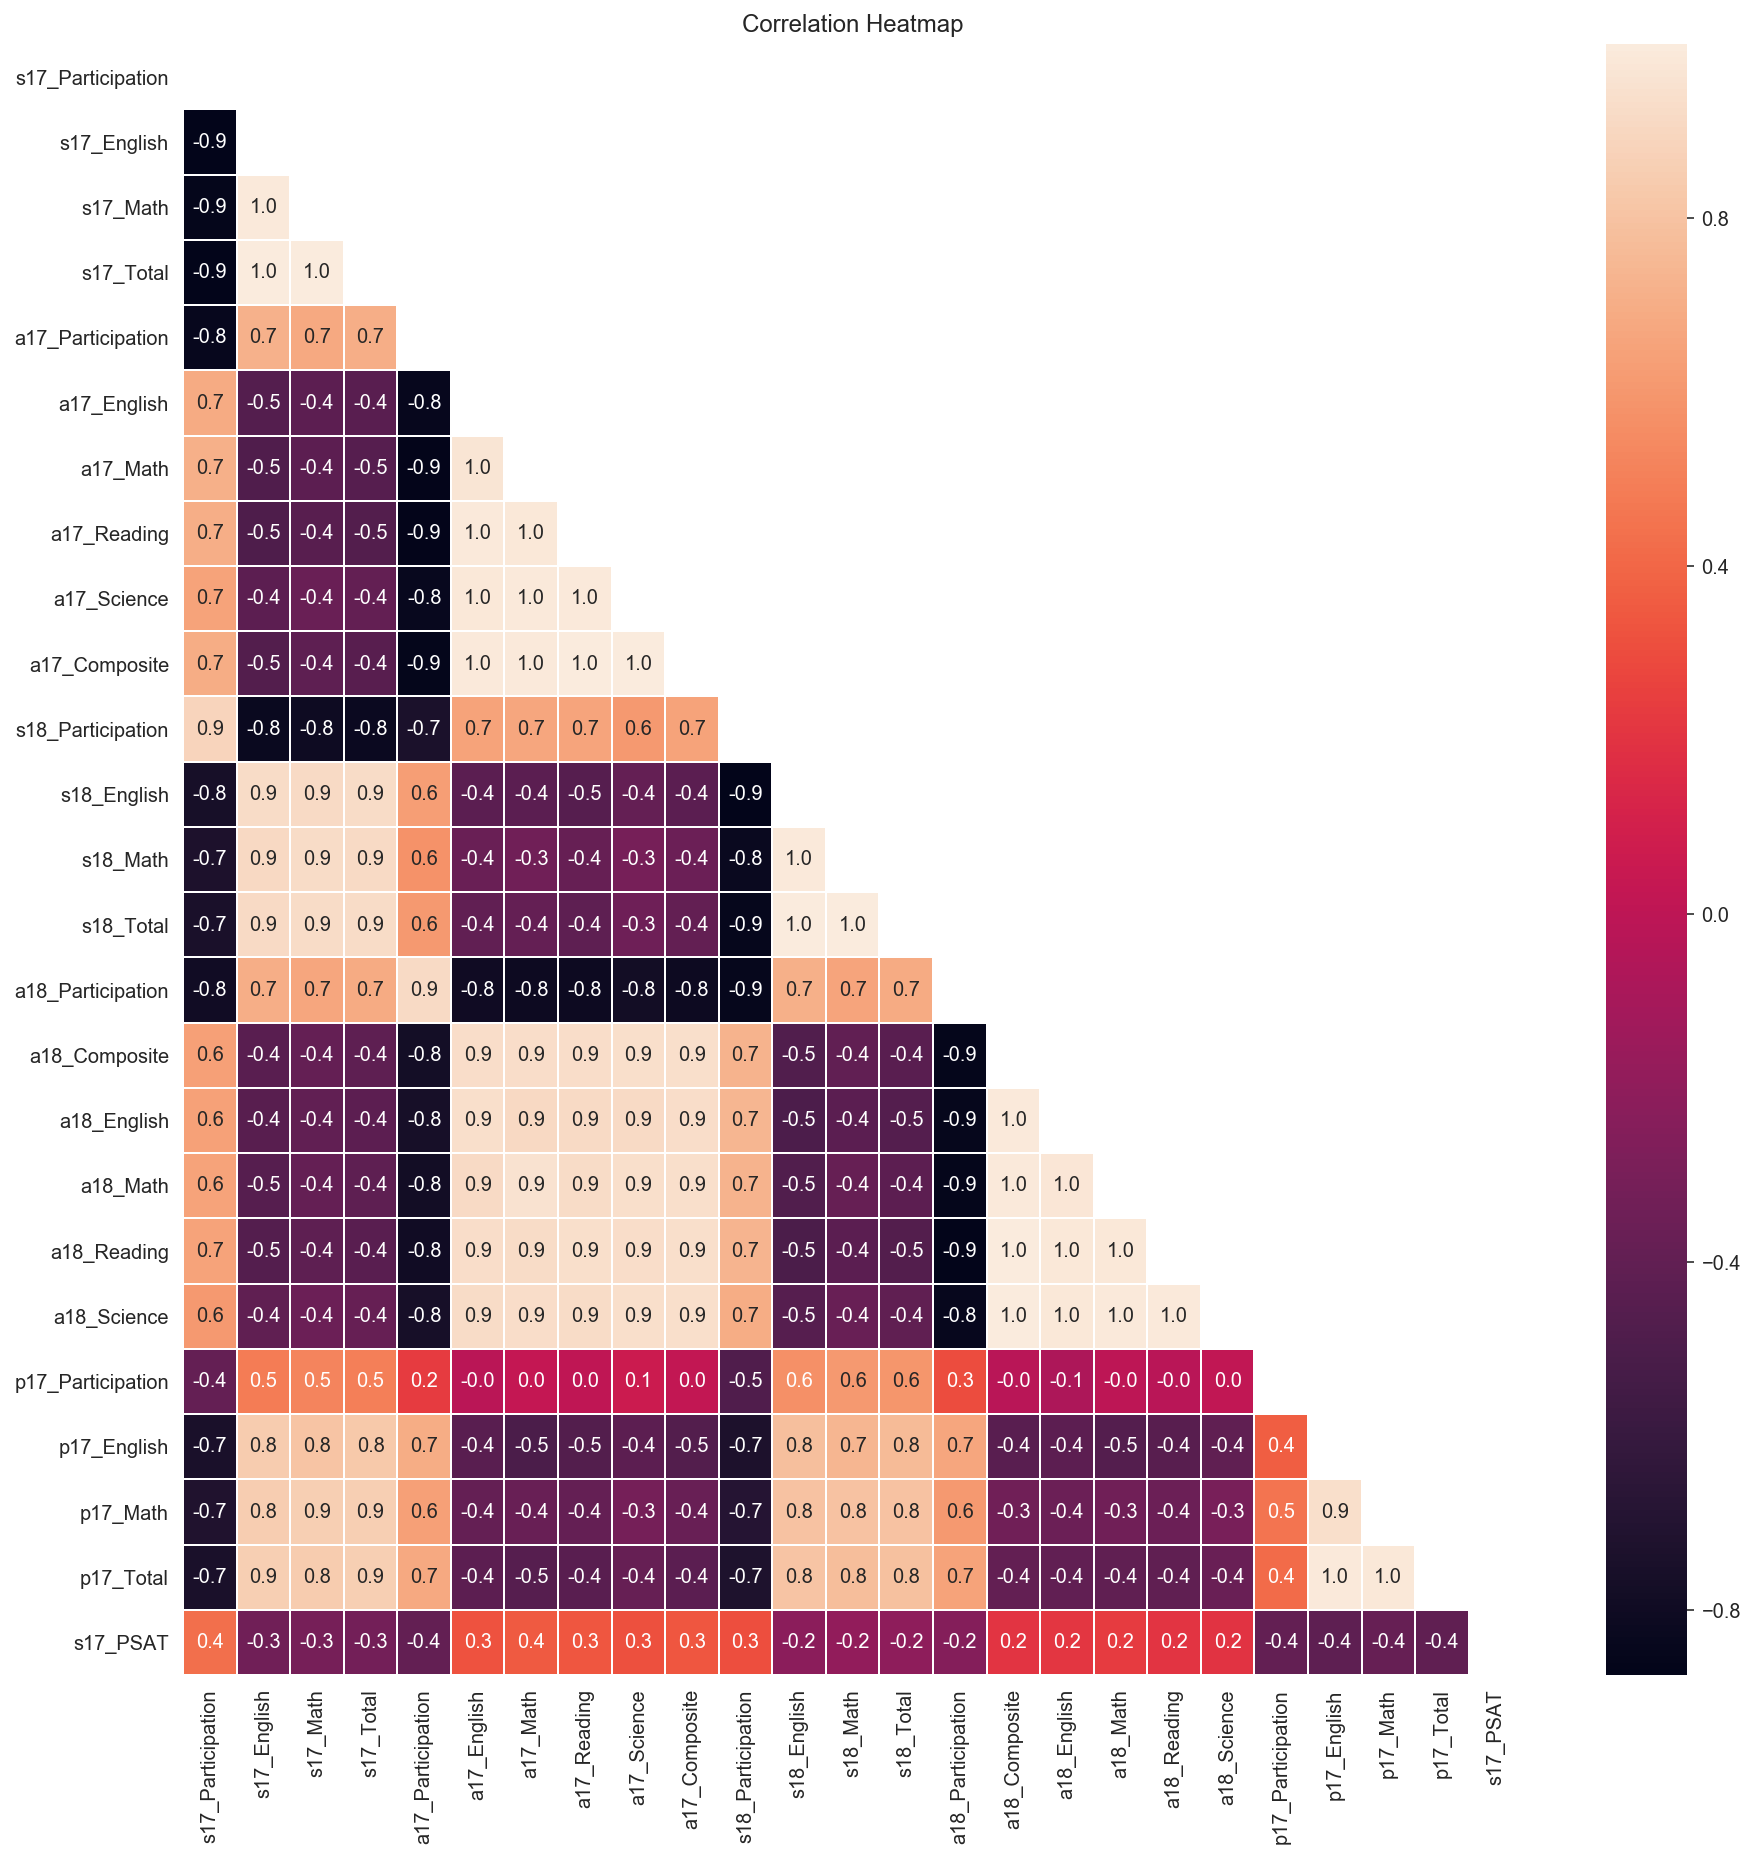

In [68]:
#Create correlation heatmap of all features in 'final'
fig, ax = plt.subplots(figsize=(15,15))
corr = np.corrcoef(final.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True #Create upper triangular mask
sns.heatmap(final.corr(),linewidths=.5,ax=ax,mask=mask,annot=True,fmt='.1f') #Enable correlation values to 1 d.p.
ax.set_title('Correlation Heatmap')
plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

[Text(0, 0.5, 'b'), Text(0.5, 0, 'a')]

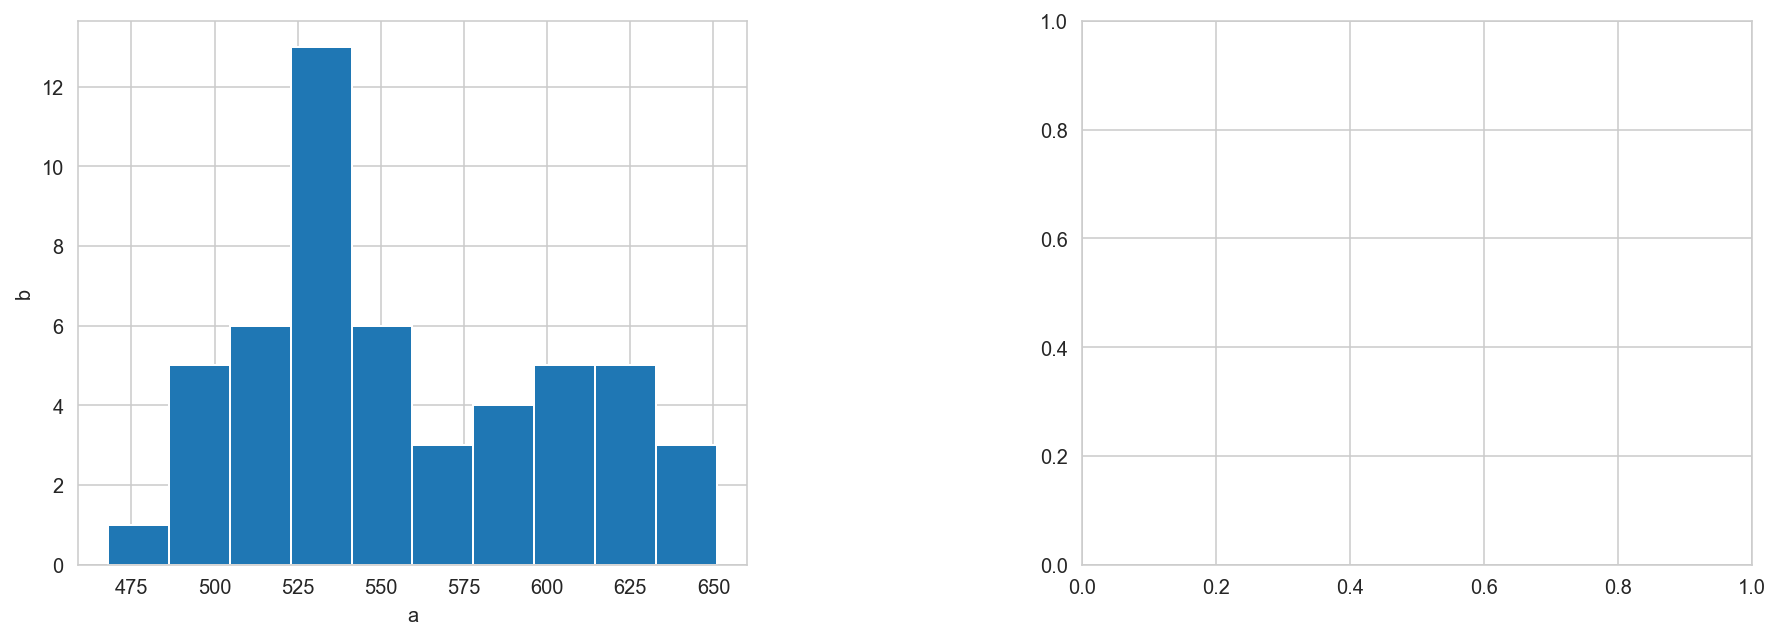

In [191]:
#Histogram method test
fig, ax=plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
ax[0].hist(final['s17_Math'])
ax[0].set(xlabel='a',ylabel='b')

<a id=histo2></a>
link to [function](#histo)

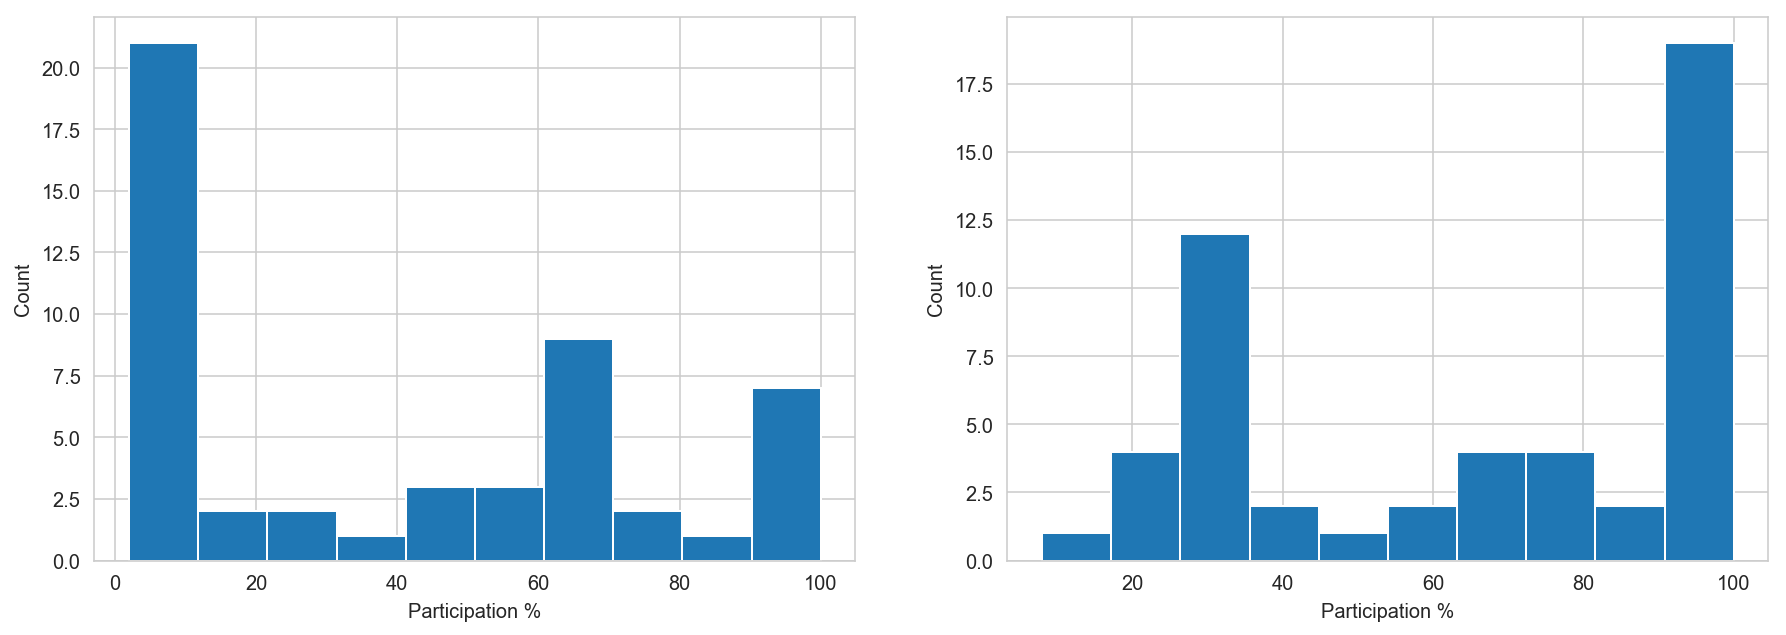

In [211]:
#subplot_histograms test
subplot_histograms(final,['s17_Participation','a17_Participation'],figsize=(15,5),commonxlabel=r'Participation %',commonylabel='Count')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

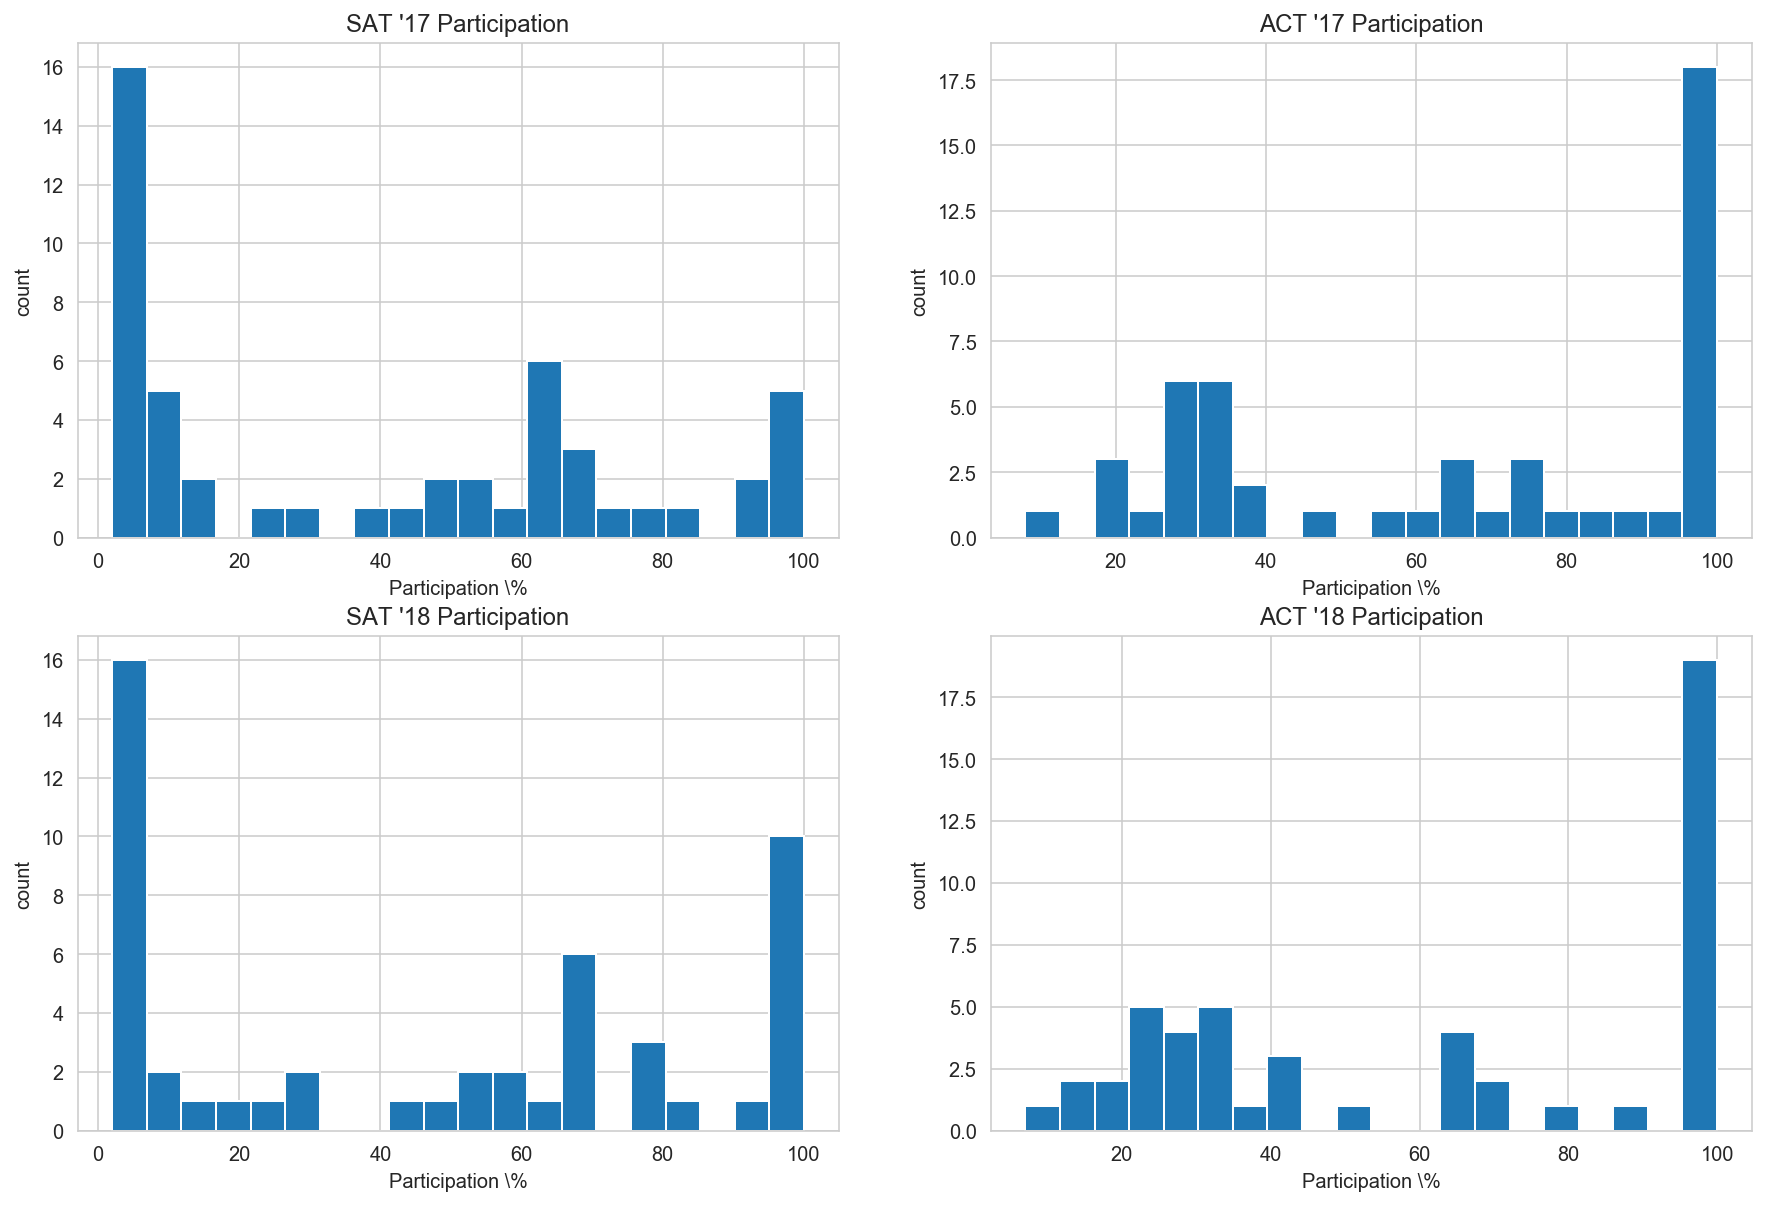

In [60]:
# Participation rates for SAT & ACT
columns=['s17_Participation','a17_Participation','s18_Participation','a18_Participation']
titles=['SAT \'17 Participation','ACT \'17 Participation','SAT \'18 Participation','ACT \'18 Participation']
subplot_histograms(final,columns,list_of_titles=titles,figsize=(15,10),commonxlabel='Participation \%',commonylabel='count')


In both 2017 and 2018, we can observe that the 100% participation rate for the ACTs is much more than that of the SATs.<br/>
This suggests that the ACT is a state-mandated test in more states than the SATs.<br/>
The 0-10% participation rate is high for the SATs as well, indicating that the SATs are not a popular test in many states.<br/>
There is a second peak around the 60-70% participation rate for the SATs, indicating the possibility that in certain states, a large number of schools (but not the whole state) are sending their students for the SATs.<br/>
There is also an increase in 100% participation of SATs from 2017 to 2018, indicating more states that are adopting the SATs as a mandated test.<br/>
The 2018 ACT histogram is also skewed more to the left compared to 2017 (by visual observation), indicating the possibility that the ACTs are falling out of favour with self-applied candidates.

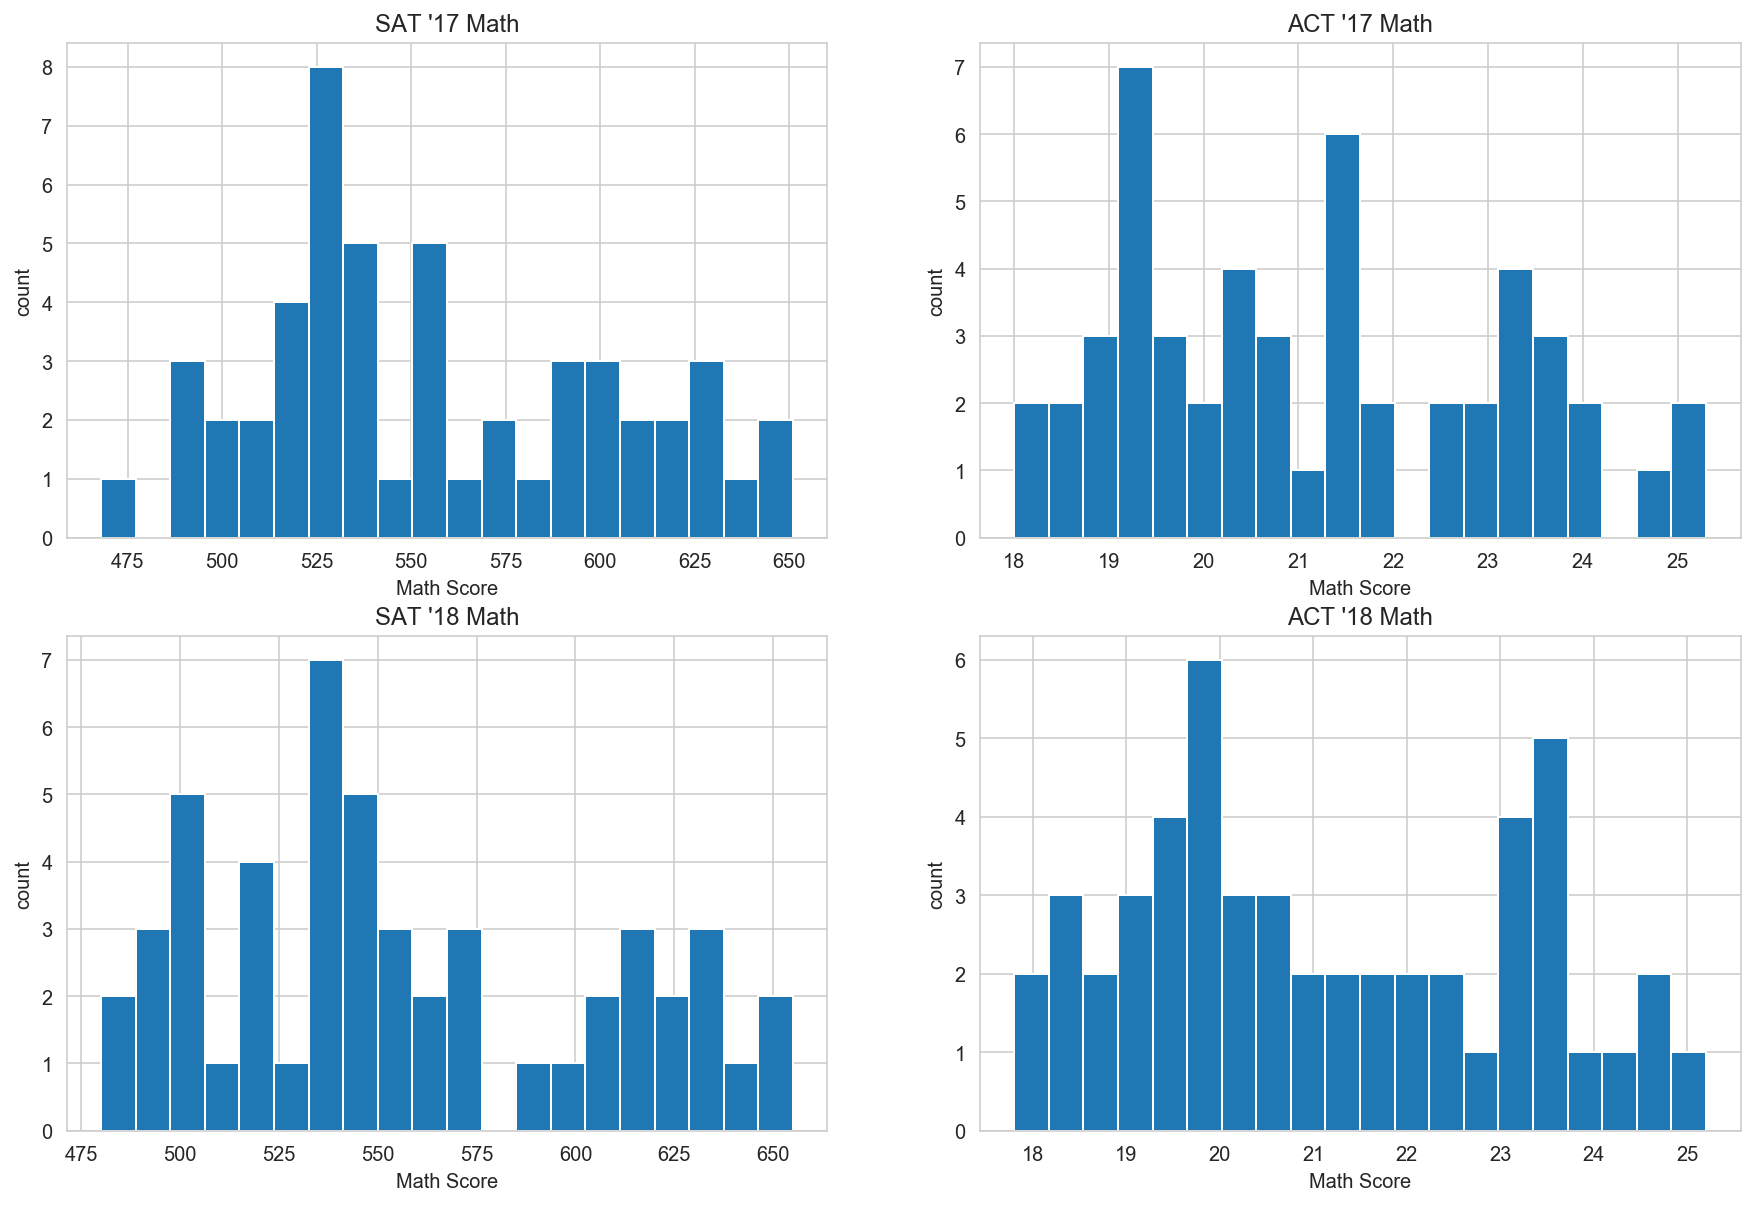

In [61]:
# Math scores for SAT & ACT
columns=['s17_Math','a17_Math','s18_Math','a18_Math']
titles=['SAT \'17 Math','ACT \'17 Math','SAT \'18 Math','ACT \'18 Math' ]
subplot_histograms(final,columns,list_of_titles=titles,figsize=(15,10),commonxlabel='Math Score',commonylabel='count')

From preliminary observations, it can be observed that the SAT histograms are more similar than the ACT histograms year-on-year. This indicates that the SAT score adjustments are more meaningful in normalizing their test difficulties.<br/>
The right-most end of the SAT histograms remain unchanged indicating that the difficulty of scoring well remains unchanged.<br/>
The ACT scores from 2017 to 2018 have improved, with an increase in the 23-24 score range as well as in the 19-20 range.<br/>

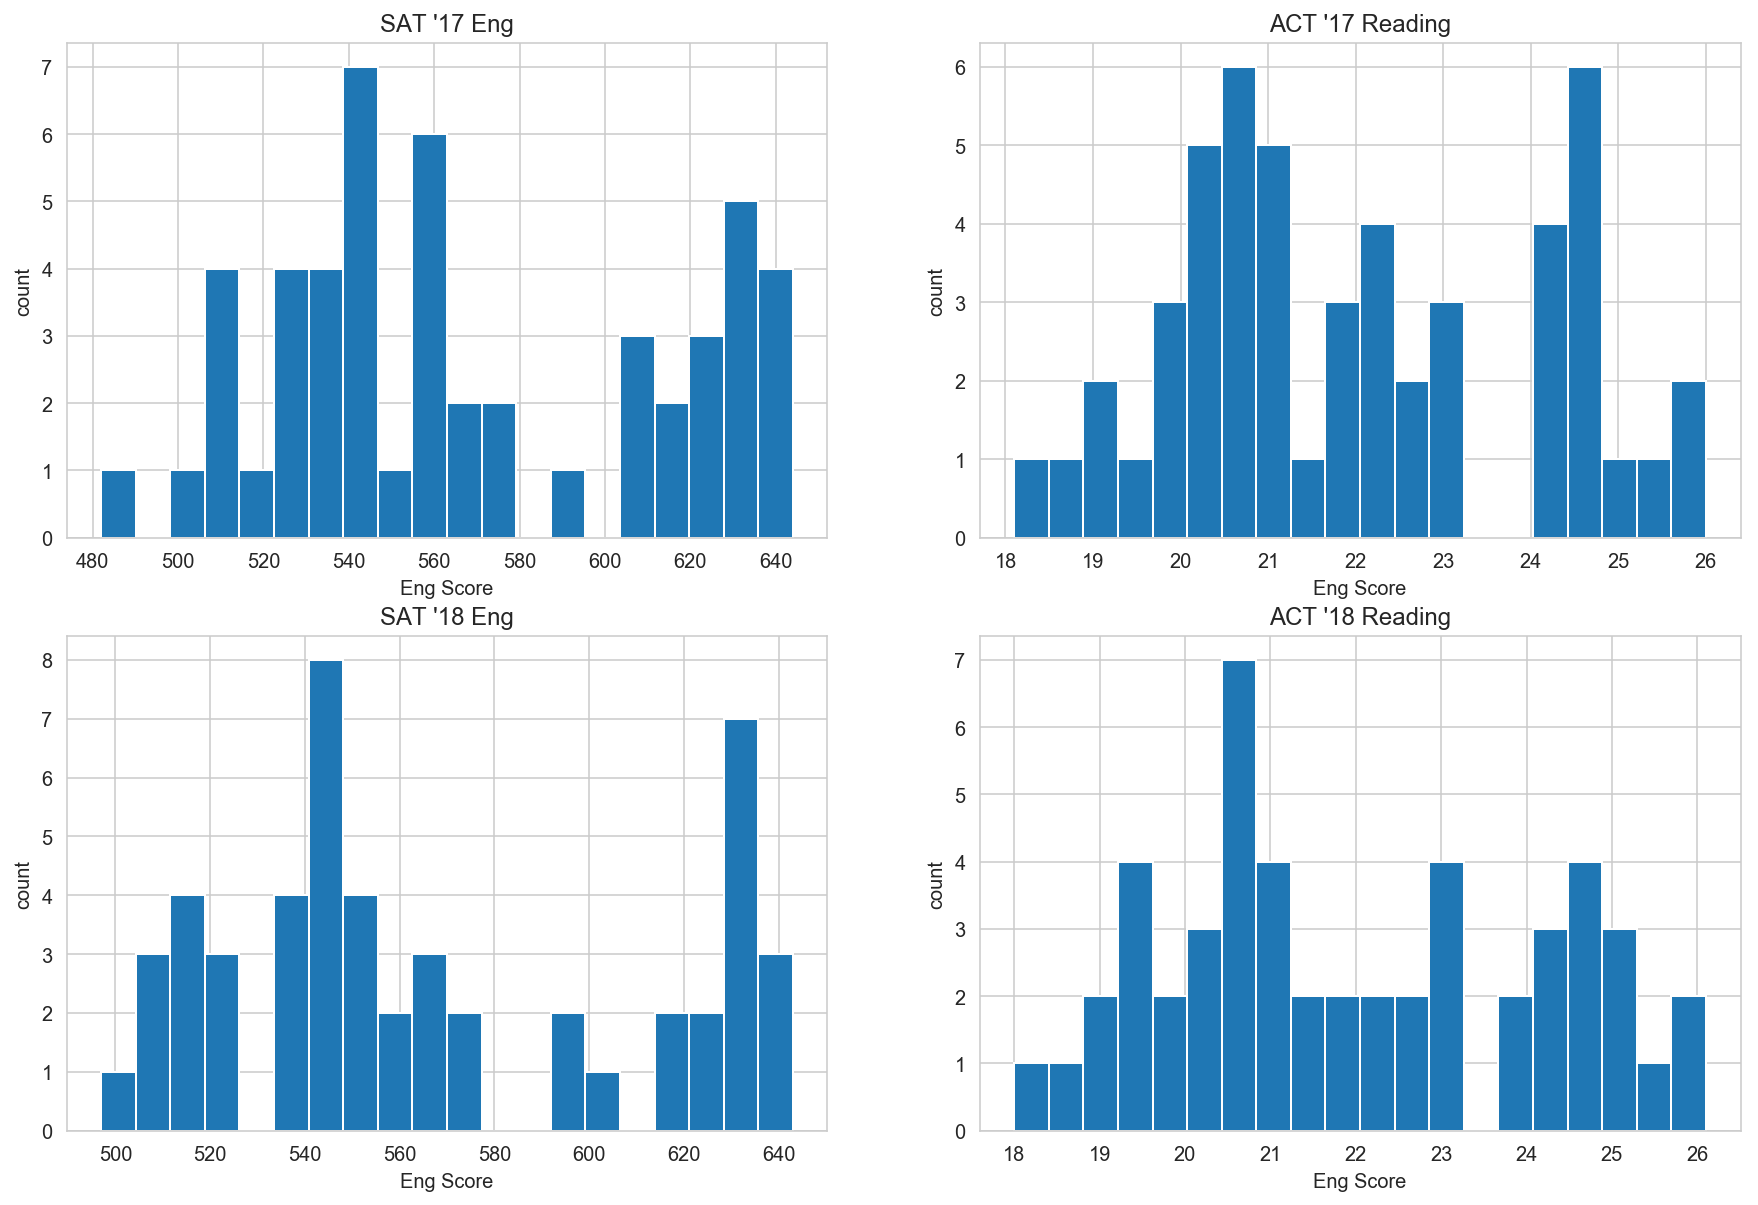

In [62]:
# Reading/verbal scores for SAT & ACT
columns=['s17_English','a17_Reading','s18_English','a18_Reading']
titles=['SAT \'17 Eng','ACT \'17 Reading','SAT \'18 Eng','ACT \'18 Reading']
subplot_histograms(final,columns,list_of_titles=titles,figsize=(15,10),commonxlabel='Eng Score',commonylabel='count')

From preliminary observations, it can be observed that it is much easier to score well in the SATs for EBRW as compared to the ACTs by comparing the right-most bins of their histograms.<br/>
SAT scores have also improved from 2017 to 2018 as left-most values have shifted towards the right.<br/>
ACT scores however, have dropped with certain score counts having shifted left.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


<a id=scat2></a>
link to [function](#scat)

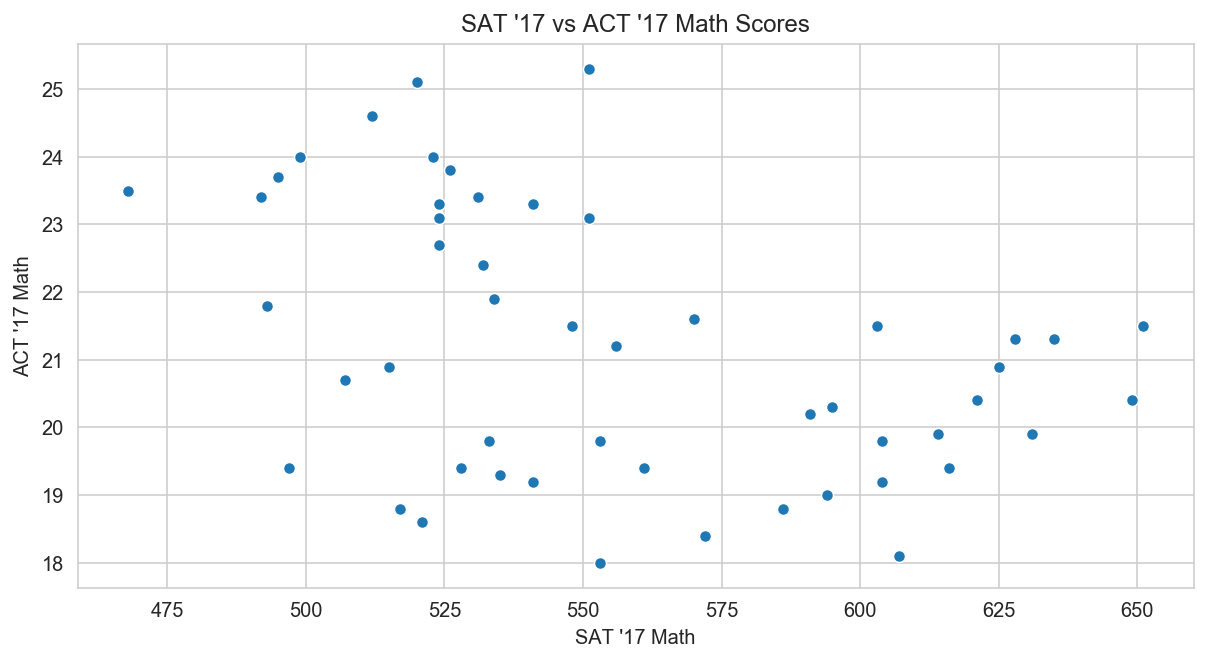

In [56]:
# SAT vs. ACT math scores for 2017
scatplt(final,'s17_Math','a17_Math',figsize=(10,5),title='SAT \'17 vs ACT \'17 Math Scores',xlabel='SAT \'17 Math',ylabel='ACT \'17 Math')

Our variables seem to have a negative correlation where high-scoring states in the ACT do not perform well in the SATs and vice-versa.<br/>
There are also a number of states which have performed poorly for both tests.<br/>
We do not find any states which have a high average for both tests.<br/>

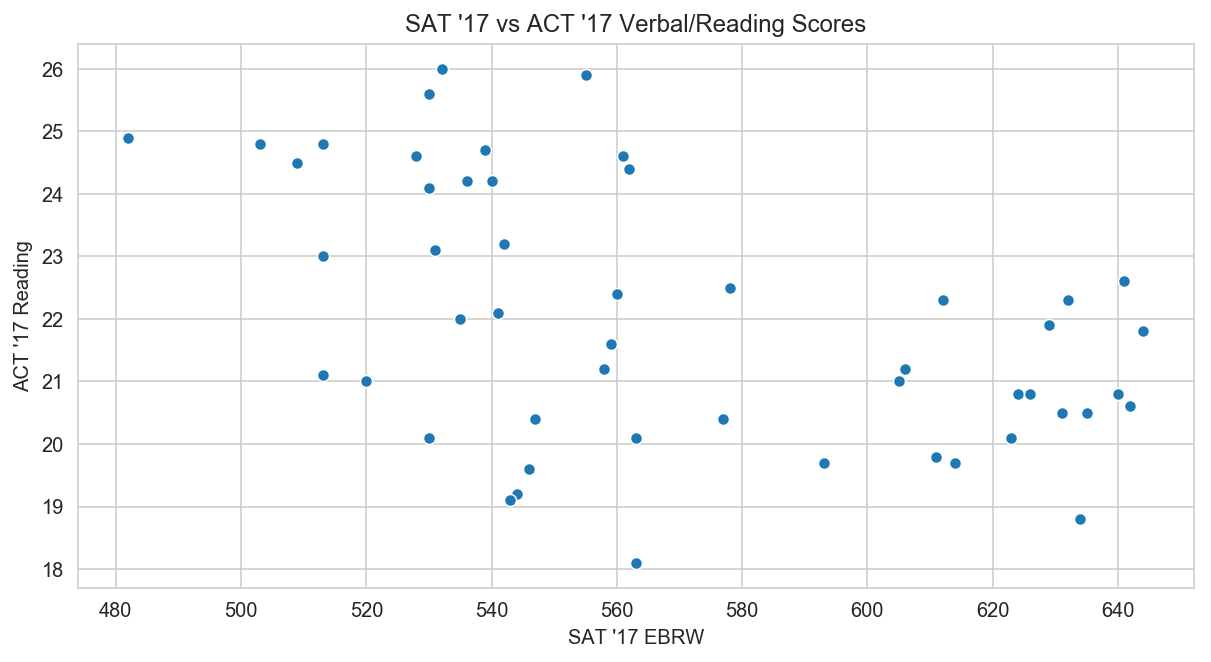

In [250]:
# SAT vs. ACT verbal/reading scores for 2017
scatplt(final,'s17_English','a17_Reading',figsize=(10,5),title='SAT \'17 vs ACT \'17 Verbal/Reading Scores',xlabel='SAT \'17 EBRW',ylabel='ACT \'17 Reading')

Similar to the above, a negative correlation is implied, along with the other properties listed in the previous graph.

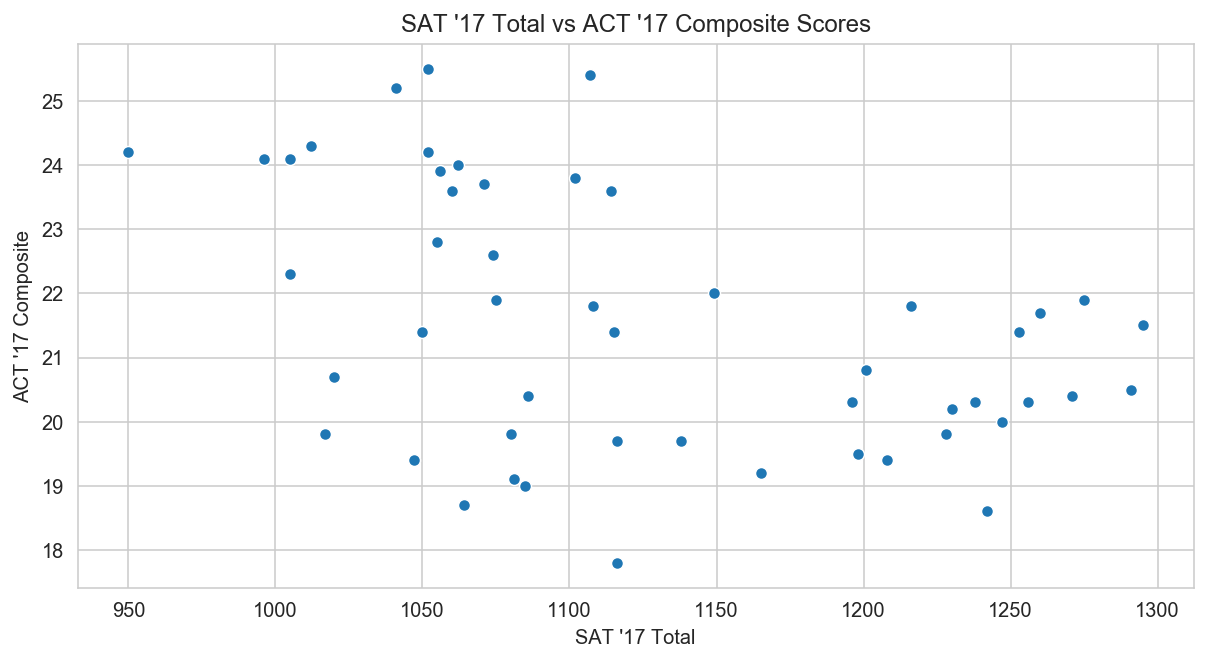

In [243]:
# SAT vs. ACT total/composite scores for 2017
scatplt(final,'s17_Total','a17_Composite',figsize=(10,5),title='SAT \'17 Total vs ACT \'17 Composite Scores',xlabel='SAT \'17 Total',ylabel='ACT \'17 Composite')

Similar to the above, a negative correlation is implied.

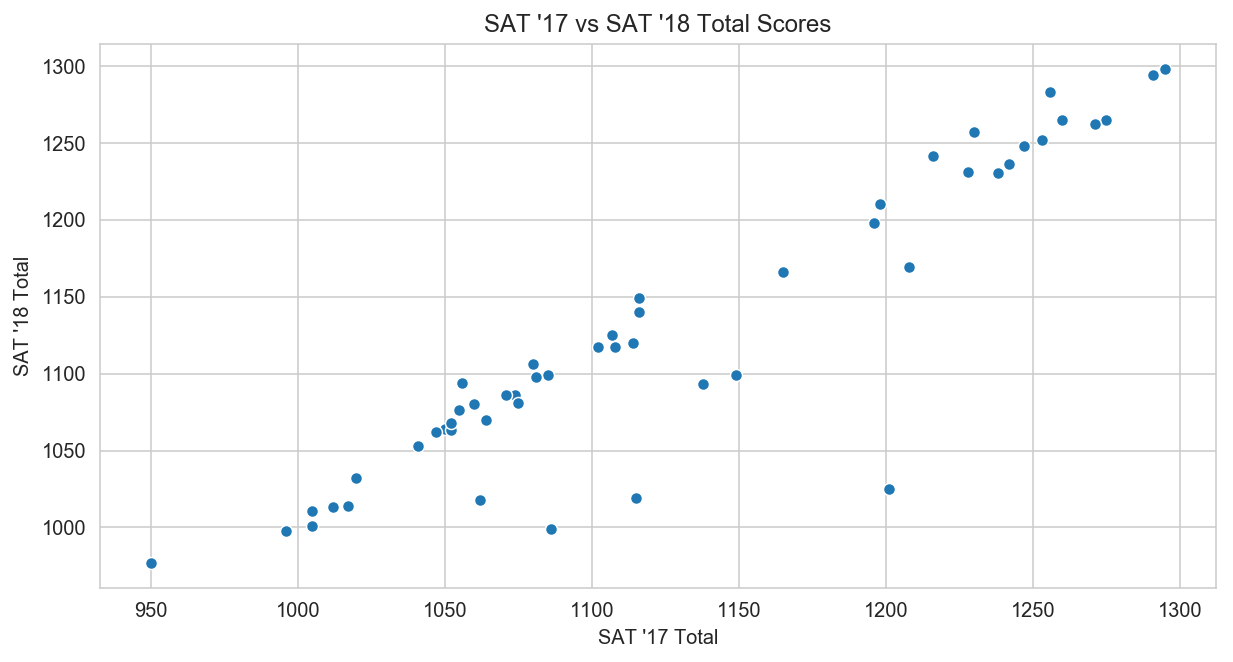

In [244]:
# Total scores for SAT 2017 vs. 2018
scatplt(final,'s17_Total','s18_Total',figsize=(10,5),title='SAT \'17 vs SAT \'18 Total Scores',xlabel='SAT \'17 Total',ylabel='SAT \'18 Total')

A strong positive correlation between our two variable can be seen.<br/>
There are some outliers below the line-of-best-fit, indicating that there are some states that performed much better in the 2017 SATs as compared to the 2018 SATs.

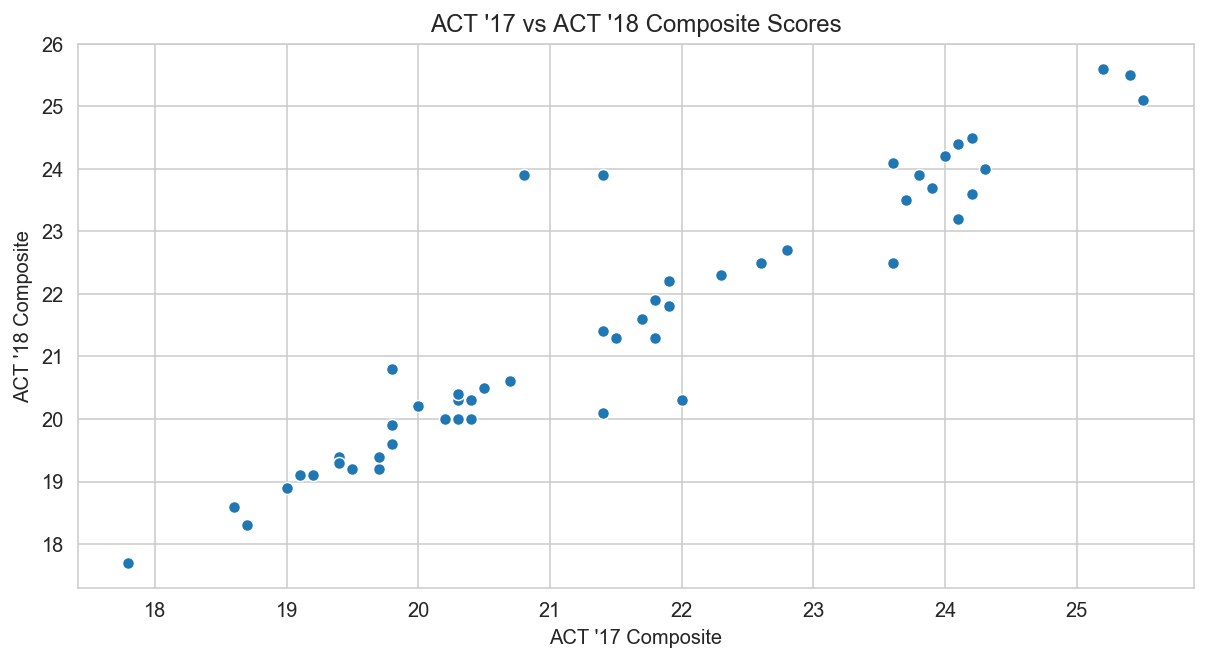

In [245]:
# Composite scores for ACT 2017 vs. 2018
scatplt(final,'a17_Composite','a18_Composite',figsize=(10,5),title='ACT \'17 vs ACT \'18 Composite Scores',xlabel='ACT \'17 Composite',ylabel='ACT \'18 Composite')

A strong positive correlation between our two variables can be seen.<br/>
There are some outliers above the line-of-best-fit, indicating that there are some states that performed much better in the 2018 ACTs as compared to the 2017 ACTs.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [255]:
#Checking min and max values of similar features in 'final'
print(final[['s17_Participation','s18_Participation','a17_Participation','a18_Participation']].describe())
print(final[['s17_English','s18_English','s17_Math','s18_Math','s17_Total','s18_Total']].describe())
print(final[['a17_English','a17_Reading','a17_Science','a17_Math','a17_Composite','a18_English','a18_Reading','a18_Science','a18_Math','a18_Composite']].describe())

       s17_Participation  s18_Participation  a17_Participation  \
count          51.000000          51.000000          51.000000   
mean           39.803922          46.627451          65.254902   
std            35.276632          38.014187          32.140842   
min             2.000000           2.000000           8.000000   
25%             4.000000           4.500000          31.000000   
50%            38.000000          52.000000          69.000000   
75%            66.000000          79.500000         100.000000   
max           100.000000         100.000000         100.000000   

       a18_Participation  
count          51.000000  
mean           61.647059  
std            34.080976  
min             7.000000  
25%            28.500000  
50%            66.000000  
75%           100.000000  
max           100.000000  
       s17_English  s18_English    s17_Math    s18_Math    s17_Total  \
count    51.000000    51.000000   51.000000   51.000000    51.000000   
mean    569.117647

[Text(0, 0.5, 'Participation Rate'), Text(0.5, 0, 'column')]

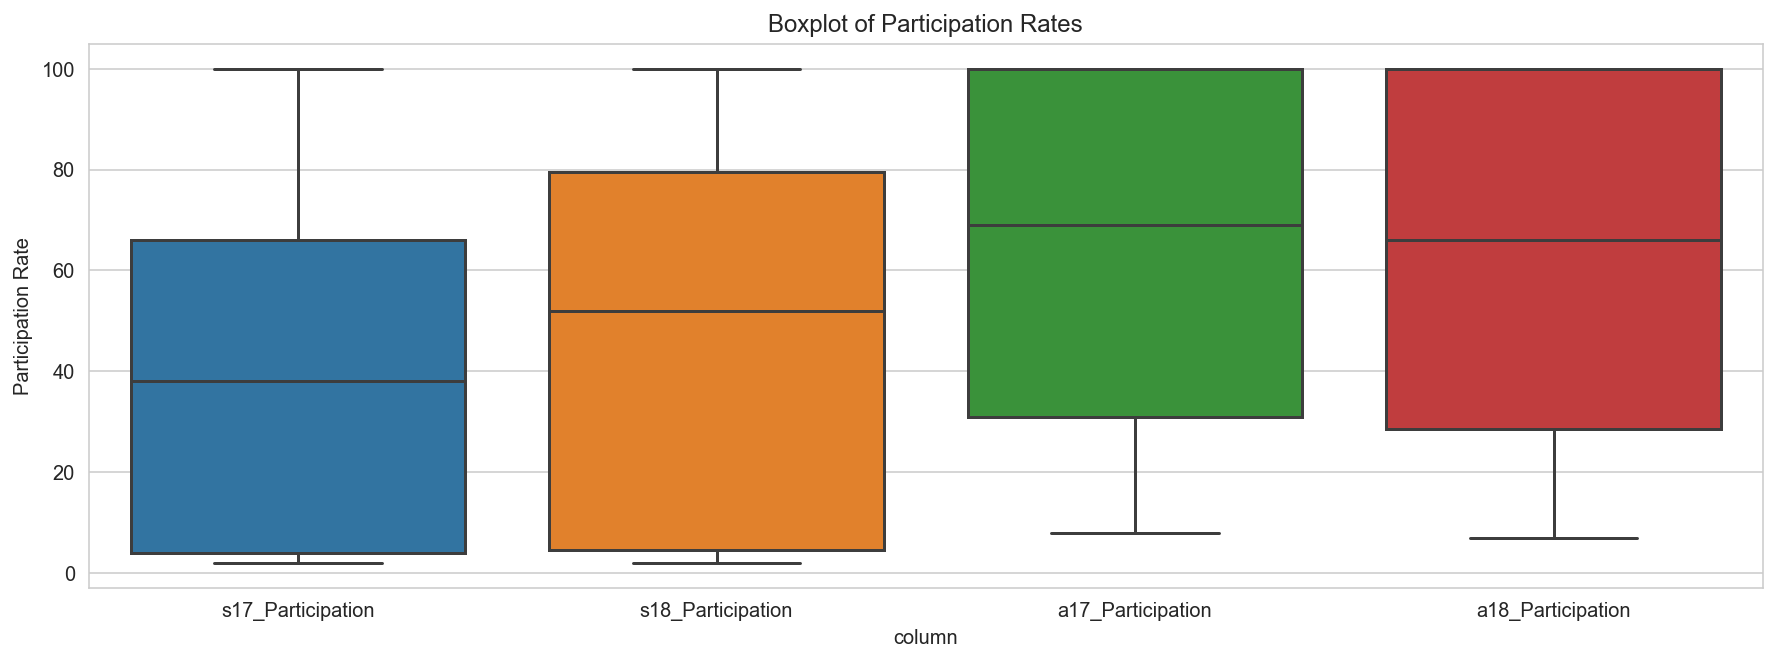

In [6]:
#boxplot method test
fig, ax=plt.subplots(figsize=(15,5))
ax.set_title('Boxplot of Participation Rates')
sns.boxplot(data=final[['s17_Participation','s18_Participation','a17_Participation','a18_Participation']])
ax.set(xlabel='column',ylabel='Participation Rate')

<a id=box2></a>
link to [function](#box)

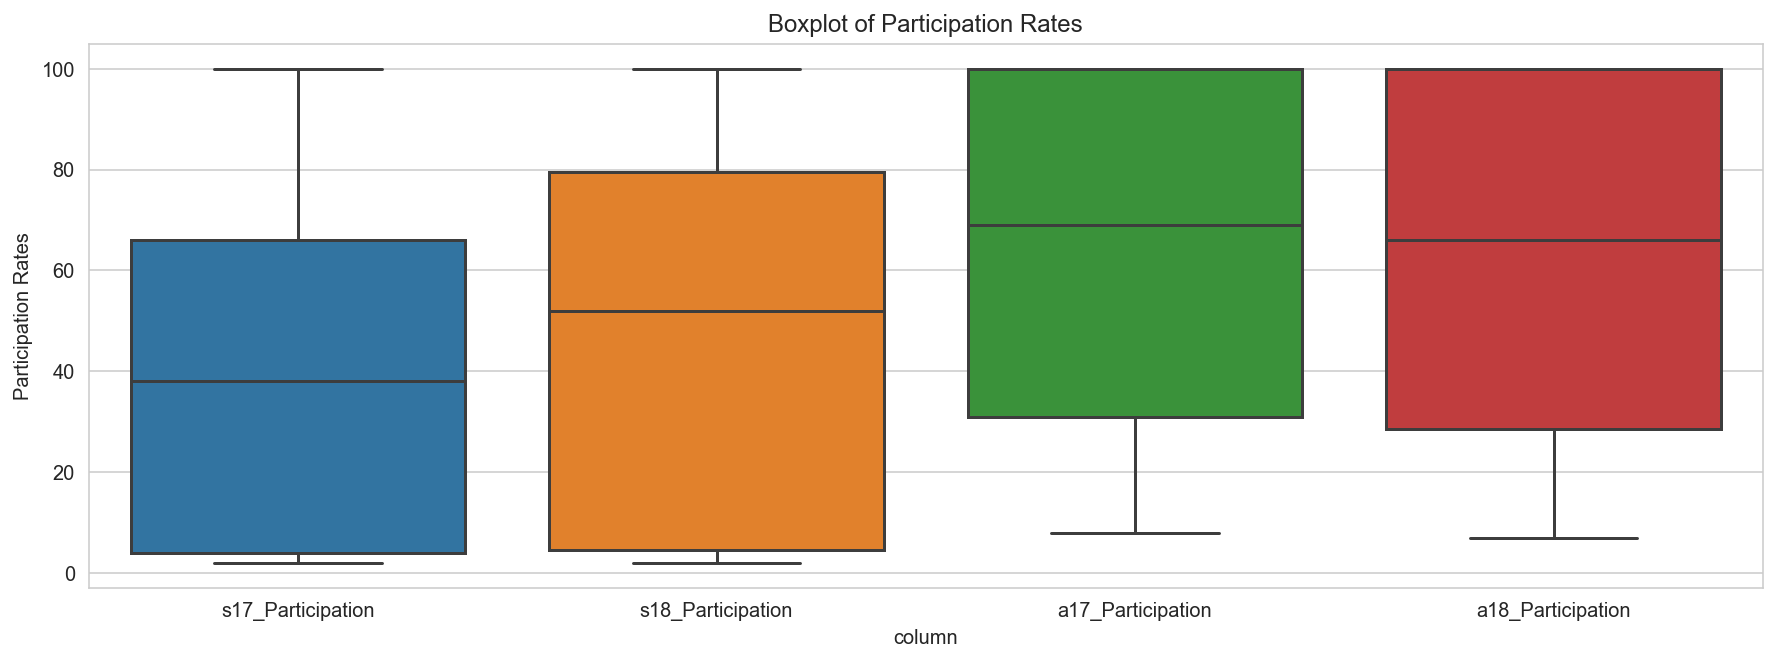

In [17]:
#boxplot of Participation Rates
boxplt(final,['s17_Participation','s18_Participation','a17_Participation','a18_Participation'],figsize=(15,5),title='Boxplot of Participation Rates',xlabel='column',ylabel='Participation Rates')

The ACT enjoys a much higher participation rate as compared to the SATs, however, the overall ACT participation rate has dropped slightly (as observed from the 25th and 50th percentile lines).<br/>
The SAT participation rate has increased. (as observed from the 50th and 75th percentile lines) 

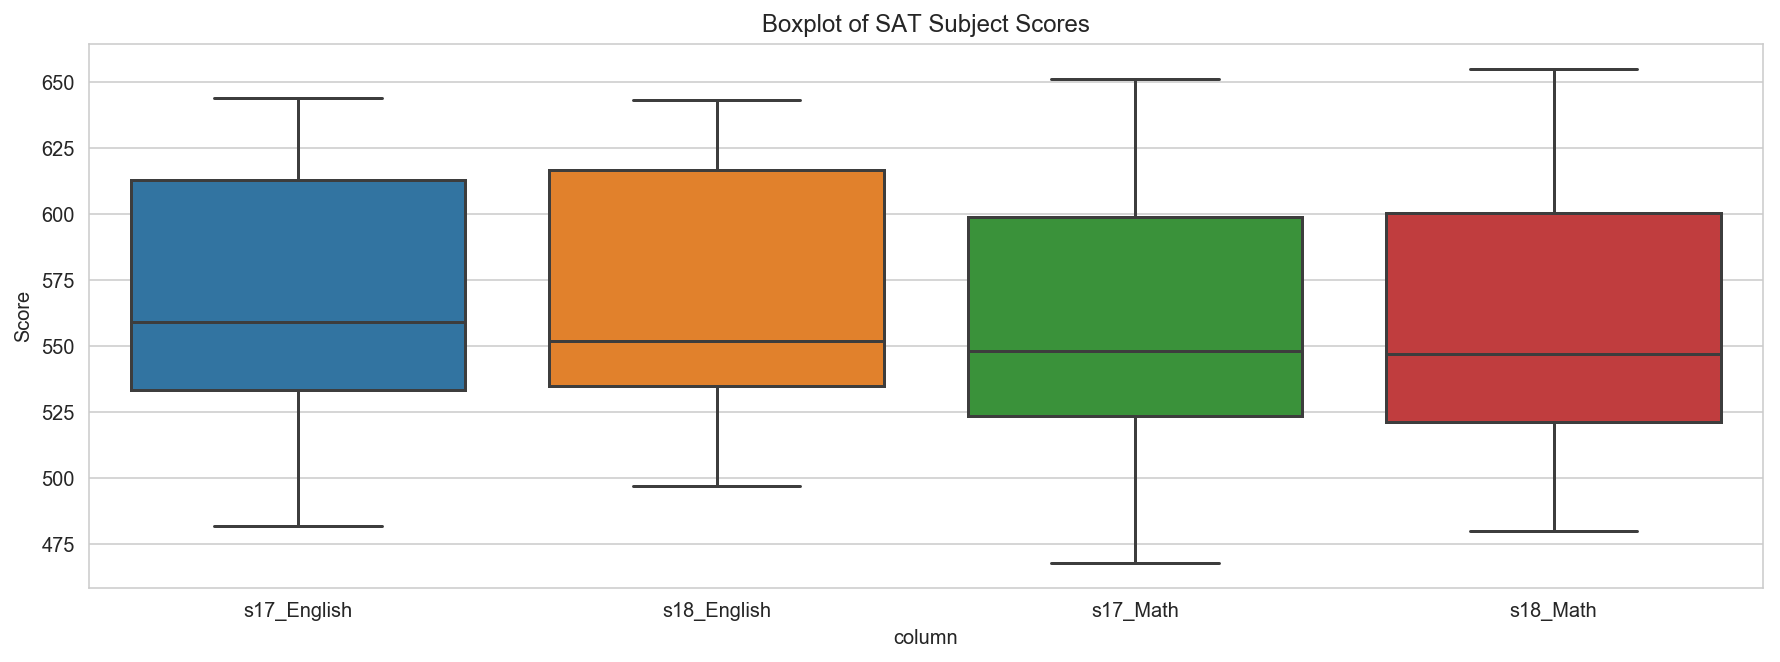

In [23]:
#boxplot of SAT subject scores
list=['s17_English','s18_English','s17_Math','s18_Math']
boxplt(final,list,figsize=(15,5),title='Boxplot of SAT Subject Scores',xlabel='column',ylabel='Score')

On average, candidates tend to score better in the SAT EBRW test as compared to the Math test.<br/>
The spread of Math scores have remained relatively similar for both years, with only a noticeable change in the min and max scores.<br/>
However, the spread of EBRW scores have shifted lower based on the difference in position of the 50th and 75th percentiles as observed in the boxplot.

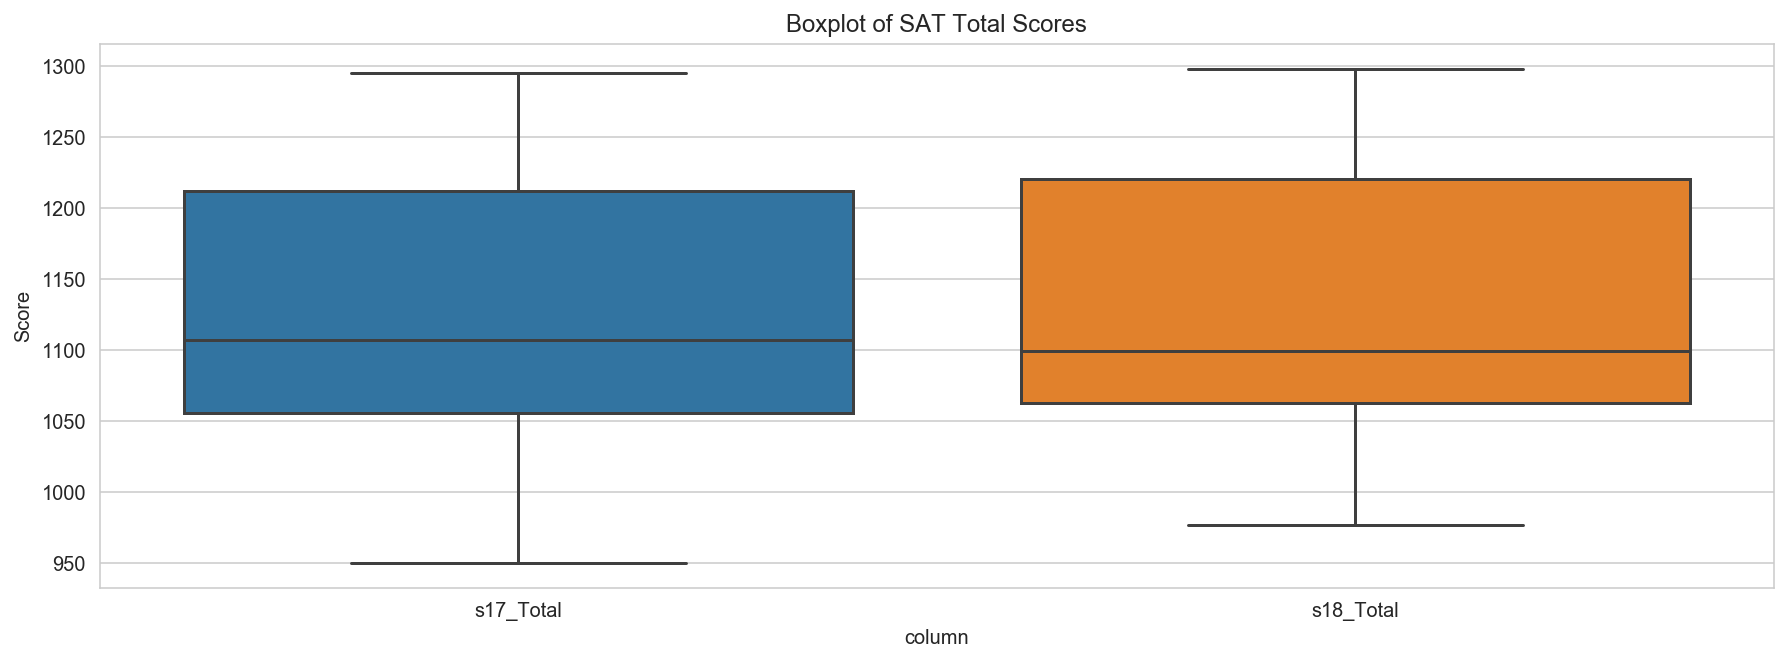

In [24]:
#boxplot of SAT total scores
list=['s17_Total','s18_Total']
boxplt(final,list,figsize=(15,5),title='Boxplot of SAT Total Scores',xlabel='column',ylabel='Score')

There are negligible shifts in the SAT total scores from 2017 to 2018, with slight upward shifts in the 25th, 75th and 100th percentiles and a slight downward shift in the 50th percentile.<br/>
The minimum score has improved a noticeable amount though.

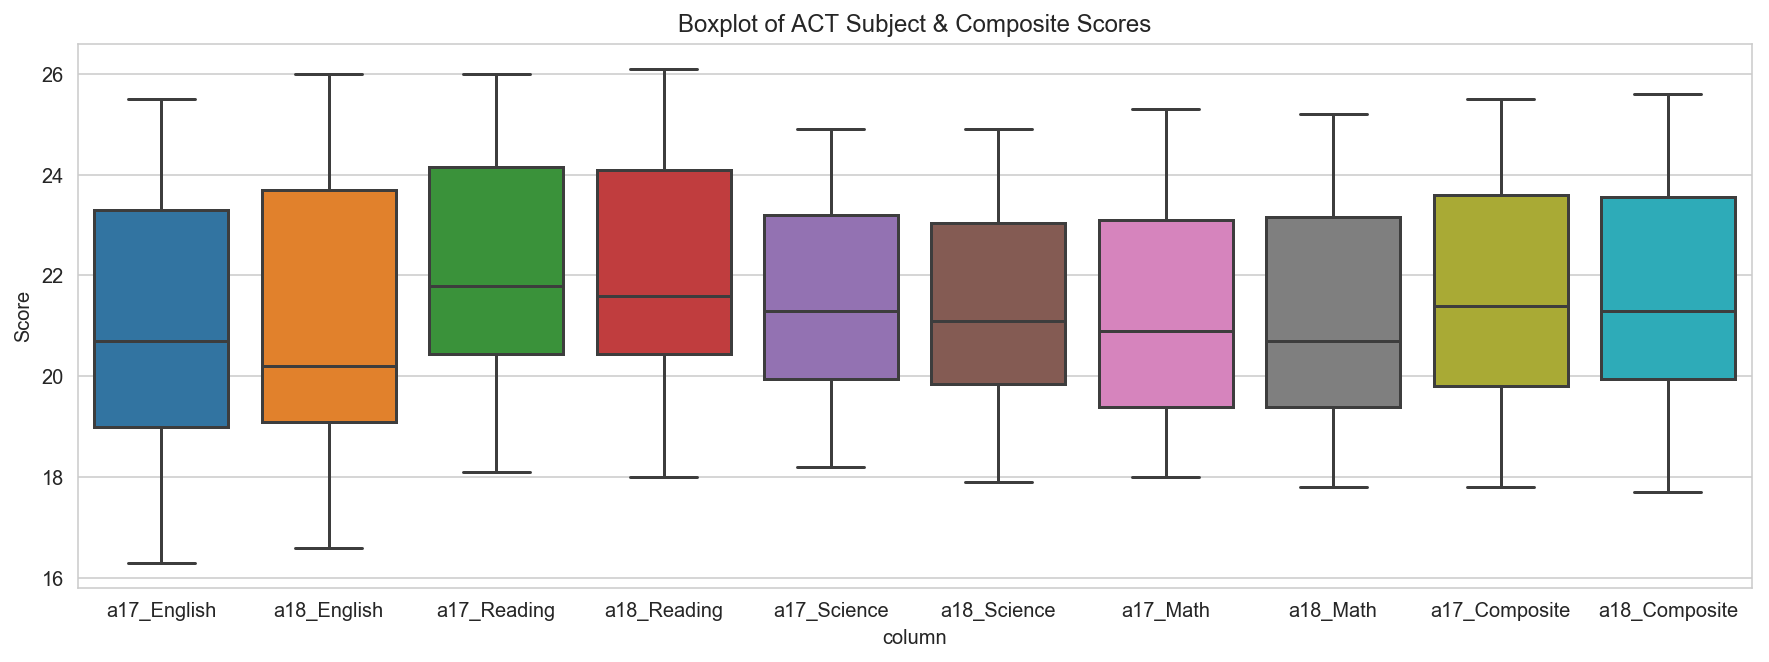

In [27]:
#boxplot of ACT subject and composite scores
list=['a17_English','a18_English','a17_Reading','a18_Reading','a17_Science','a18_Science','a17_Math','a18_Math','a17_Composite','a18_Composite']
boxplt(final,list,figsize=(15,5),title='Boxplot of ACT Subject & Composite Scores',xlabel='column',ylabel='Score')

Scores have remained relatively stable. On average, English seems to be the worst performing subject while reading seems to be the best.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

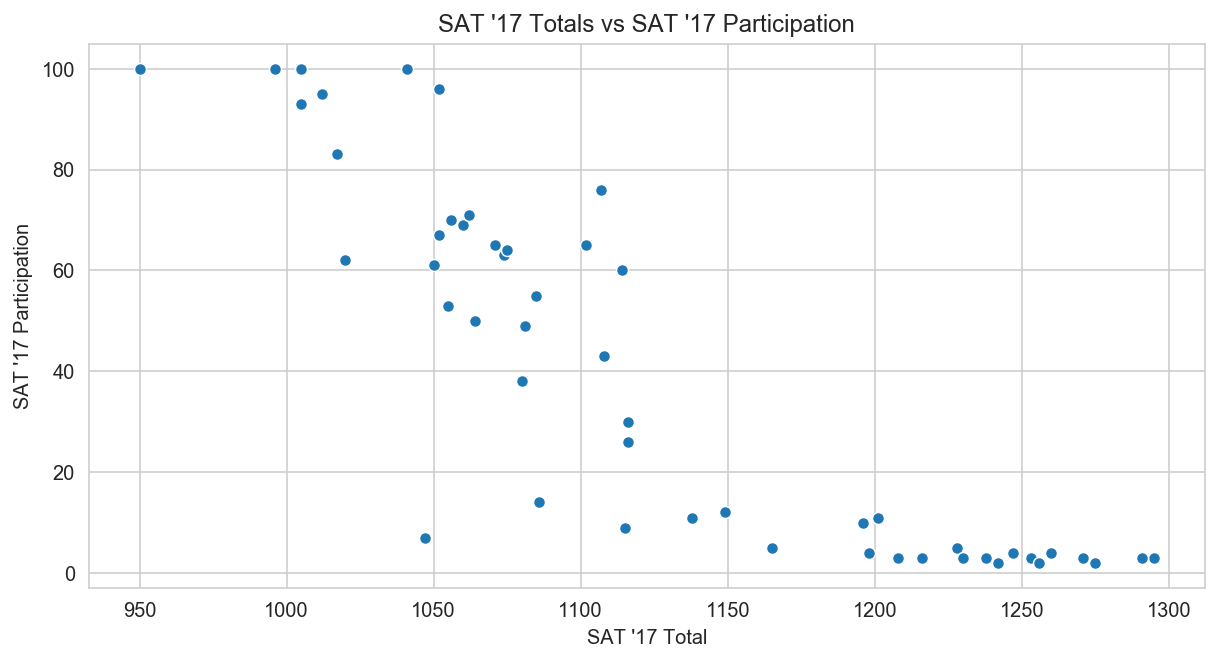

In [8]:
scatplt(final,'s17_Total','s17_Participation',figsize=(10,5),title='SAT \'17 Totals vs SAT \'17 Participation',xlabel='SAT \'17 Total',ylabel='SAT \'17 Participation')

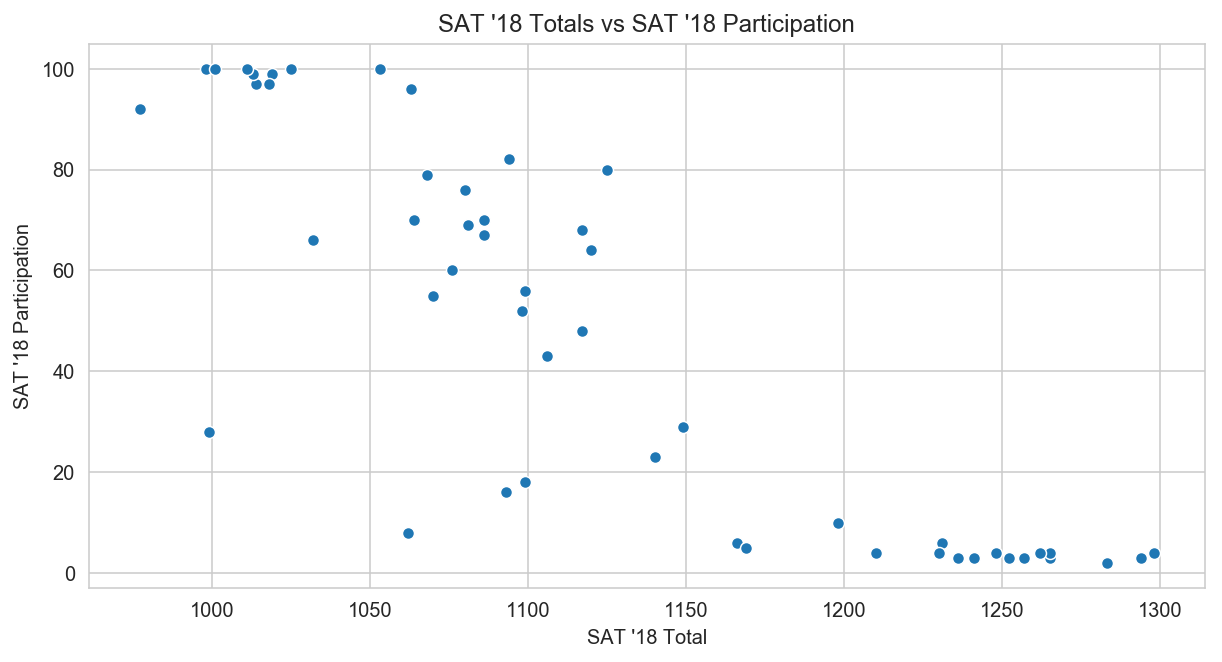

In [70]:
scatplt(final,'s18_Total','s18_Participation',figsize=(10,5),title='SAT \'18 Totals vs SAT \'18 Participation',xlabel='SAT \'18 Total',ylabel='SAT \'18 Participation')

A negative correlation seems to be observed for the two graphs above, indicating that states with mandated SATs seem to perform worse than states with predominantly self-applied candidates.

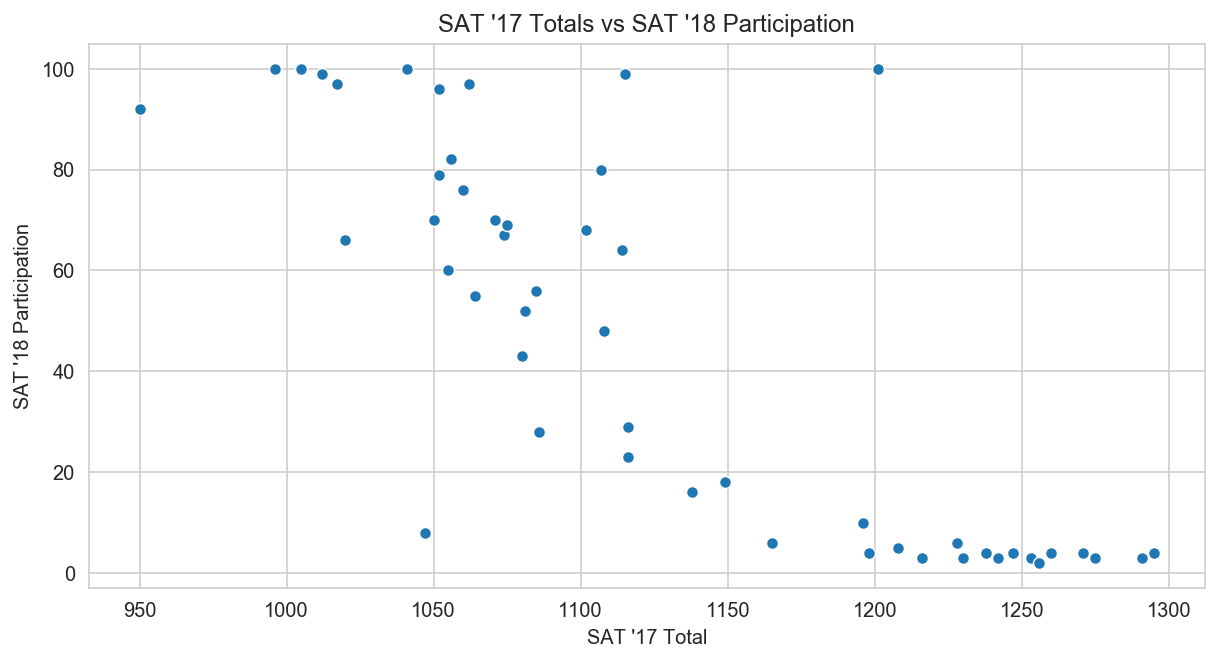

In [7]:
scatplt(final,'s17_Total','s18_Participation',figsize=(10,5),title='SAT \'17 Totals vs SAT \'18 Participation',xlabel='SAT \'17 Total',ylabel='SAT \'18 Participation')

A negative correlation seems to be observed but it does not make sense that high performing states would be influenced to have lower participation in the next year.

In [43]:
# import psat 2017 data for 11th graders
psat_2017=pd.read_csv("..\data\psat_2017.csv")
psat_2017.set_index(final.index,inplace=True)
psat_2017.drop(columns='State',inplace=True)
psat_2017.rename(index=str,columns={'Evidence-Based Reading and Writing':'English'},inplace=True)
conv_num(psat_2017,'Participation','int')

,Participation,English,Math,Total
State,,,,
Alabama,50,545.0,514.0,1058.0
Alaska,58,539.0,524.0,1063.0
Arizona,42,522.0,512.0,1035.0
Arkansas,27,560.0,531.0,1091.0
California,43,501.0,492.0,994.0
Colorado,23,557.0,542.0,1099.0
Connecticut,49,512.0,494.0,1005.0
Delaware,37,510.0,497.0,1007.0
District of Columbia,45,480.0,471.0,951.0


In [44]:
prependtocol(psat_2017,'p17_')

,p17_Participation,p17_English,p17_Math,p17_Total
State,,,,
Alabama,50,545.0,514.0,1058.0
Alaska,58,539.0,524.0,1063.0
Arizona,42,522.0,512.0,1035.0
Arkansas,27,560.0,531.0,1091.0
California,43,501.0,492.0,994.0
Colorado,23,557.0,542.0,1099.0
Connecticut,49,512.0,494.0,1005.0
Delaware,37,510.0,497.0,1007.0
District of Columbia,45,480.0,471.0,951.0


In [37]:
psat_2017

,p17_Participation,p17_English,p17_Math,p17_Total
State,,,,
Alabama,50.0,545.0,514.0,1058.0
Alaska,58.0,539.0,524.0,1063.0
Arizona,42.0,522.0,512.0,1035.0
Arkansas,27.0,560.0,531.0,1091.0
California,43.0,501.0,492.0,994.0
Colorado,23.0,557.0,542.0,1099.0
Connecticut,49.0,512.0,494.0,1005.0
Delaware,37.0,510.0,497.0,1007.0
District of Columbia,45.0,480.0,471.0,951.0


In [46]:
final=final.merge(psat_2017,left_index=True,right_index=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 24 columns):
s17_Participation    51 non-null int64
s17_English          51 non-null int64
s17_Math             51 non-null int64
s17_Total            51 non-null int64
a17_Participation    51 non-null int64
a17_English          51 non-null float64
a17_Math             51 non-null float64
a17_Reading          51 non-null float64
a17_Science          51 non-null float64
a17_Composite        51 non-null float64
s18_Participation    51 non-null int64
s18_English          51 non-null int64
s18_Math             51 non-null int64
s18_Total            51 non-null int64
a18_Participation    51 non-null int64
a18_Composite        51 non-null float64
a18_English          51 non-null float64
a18_Math             51 non-null float64
a18_Reading          51 non-null float64
a18_Science          51 non-null float64
p17_Participation    51 non-null int64
p17_English          51 non-null float64
p17_Math   

In [54]:
#import percentage of SAT 2017 candidates who have not taken the PSAT
nopsat_2017=pd.read_csv(r'..\data\nopsat_2017.csv')
nopsat_2017.set_index(final.index,inplace=True)
nopsat_2017.drop(columns='State',inplace=True)
prependtocol(nopsat_2017,'s17_')

,s17_NoPSAT
State,
Alabama,27.0
Alaska,42.0
Arizona,20.0
Arkansas,19.0
California,18.0
Colorado,23.0
Connecticut,8.0
Delaware,9.0
District of Columbia,13.0


In [55]:
final=final.merge(nopsat_2017,left_index=True,right_index=True)

In [63]:
#convert NoPSAT data to percentage of SAT '17 candidates who have taken the PSATs
final['s17_NoPSAT']=100-final['s17_NoPSAT']
final.rename(index=str,columns={'s17_NoPSAT':'s17_PSAT'},inplace=True)

In [65]:
# test
final[['s17_Participation','s17_PSAT']]

,s17_Participation,s17_PSAT
State,,
Alabama,5,73.0
Alaska,38,58.0
Arizona,30,80.0
Arkansas,3,81.0
California,53,82.0
Colorado,11,77.0
Connecticut,100,92.0
Delaware,100,91.0
District of Columbia,100,87.0


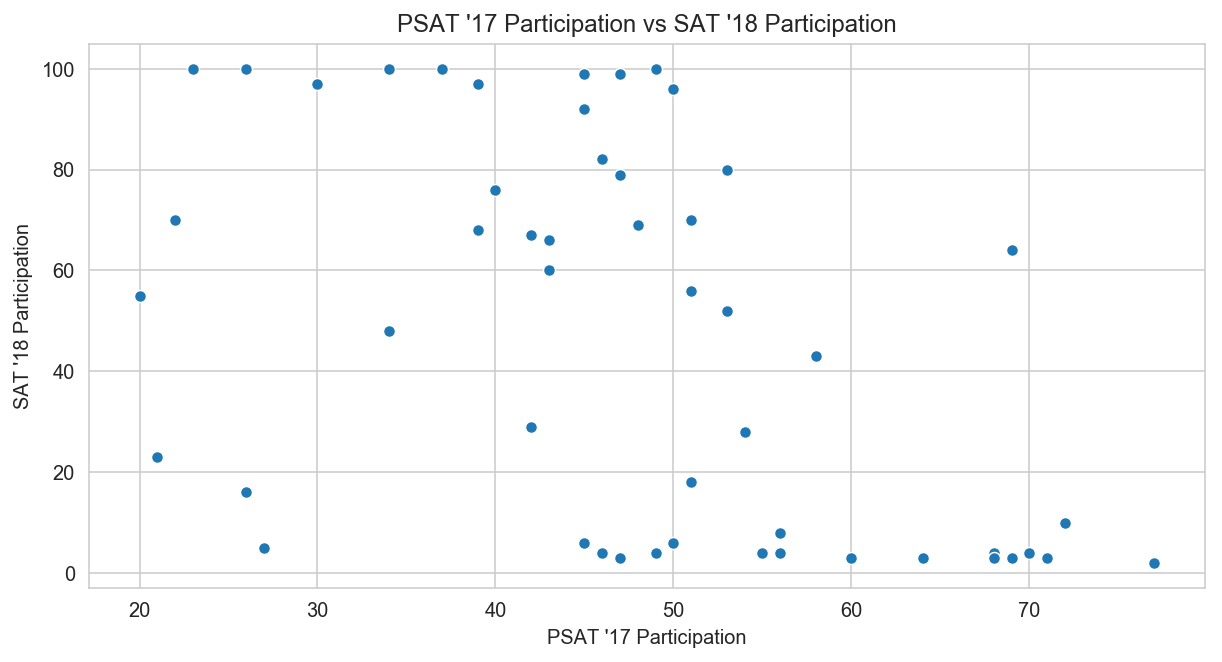

In [47]:
scatplt(final,'p17_Participation','s18_Participation',figsize=(10,5),title='PSAT \'17 Participation vs SAT \'18 Participation',xlabel='PSAT \'17 Participation',ylabel='SAT \'18 Participation')

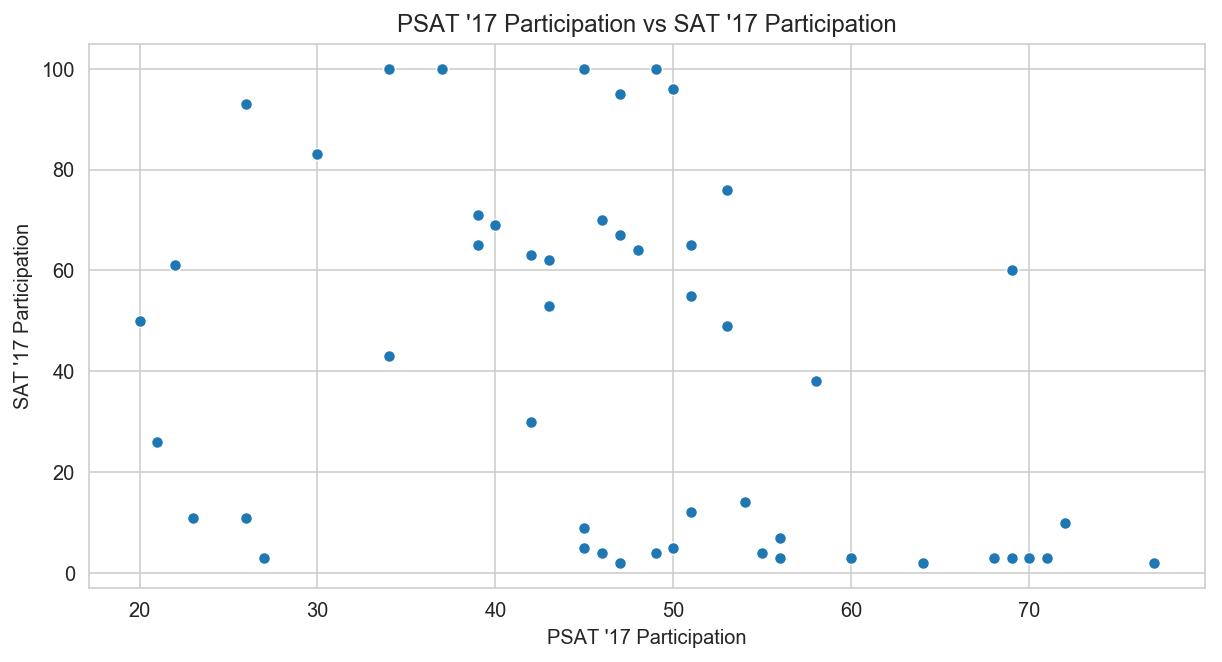

In [69]:
scatplt(final,'p17_Participation','s17_Participation',figsize=(10,5),title='PSAT \'17 Participation vs SAT \'17 Participation',xlabel='PSAT \'17 Participation',ylabel='SAT \'17 Participation')

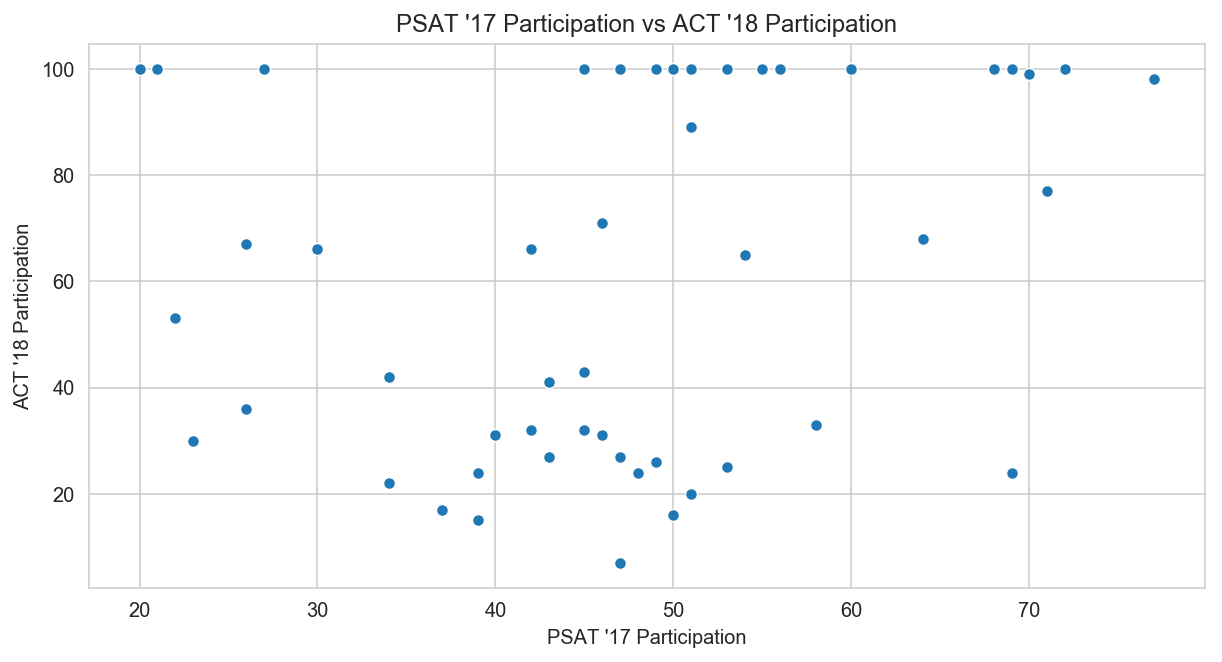

In [50]:
scatplt(final,'p17_Participation','a18_Participation',figsize=(10,5),title='PSAT \'17 Participation vs ACT \'18 Participation',xlabel='PSAT \'17 Participation',ylabel='ACT \'18 Participation')

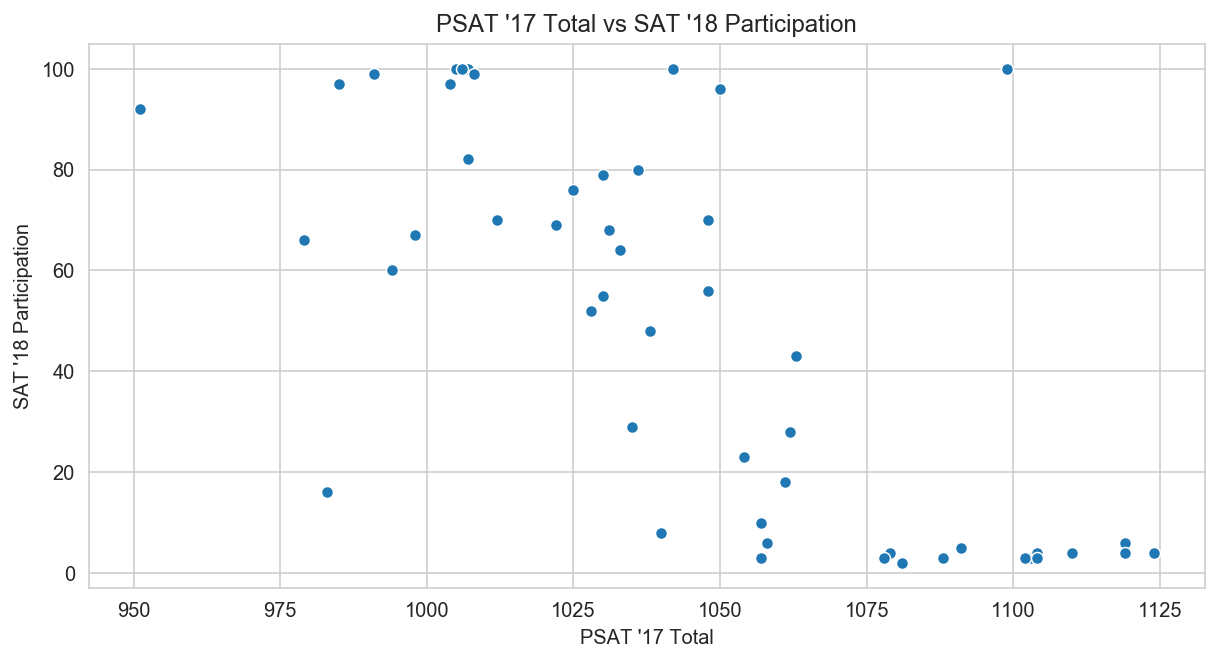

In [52]:
scatplt(final,'p17_Total','s18_Participation',figsize=(10,5),title='PSAT \'17 Total vs SAT \'18 Participation',xlabel='PSAT \'17 Total',ylabel='SAT \'18 Participation')

It was realized after plotting that PSAT '17 11th grade data is not useful as 11th graders can take the SAT and ACTs in the same year as well, as such it is not a good predictor to analyze.  

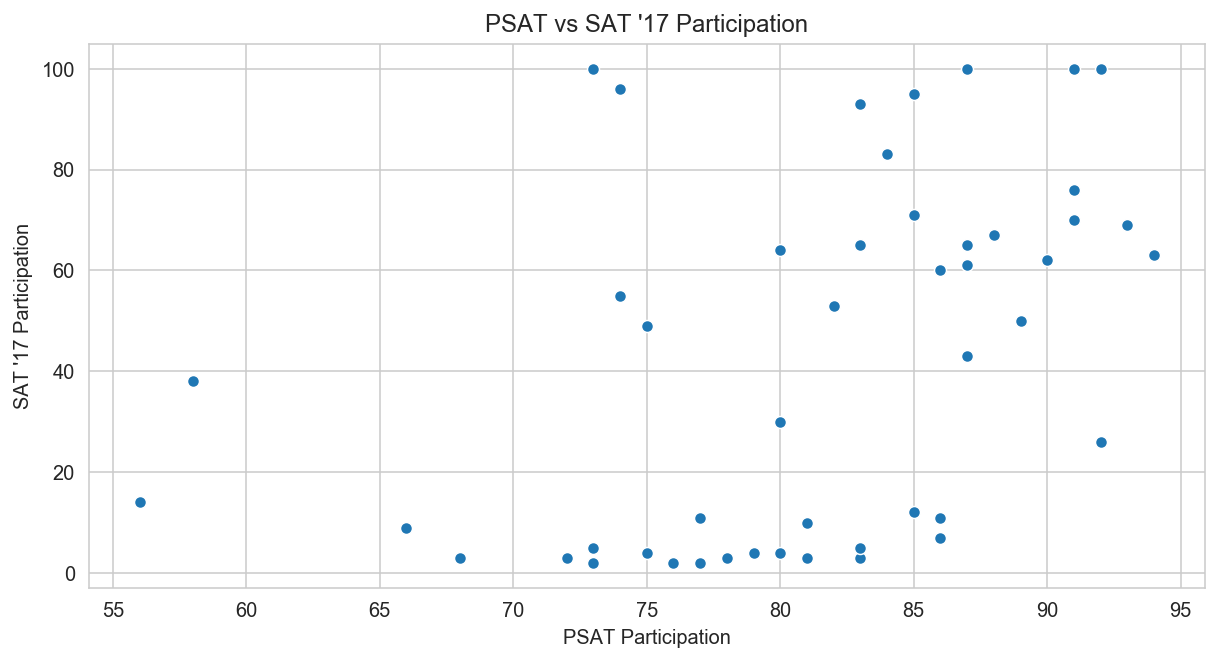

In [66]:
scatplt(final,'s17_PSAT','s17_Participation',figsize=(10,5),title='PSAT vs SAT \'17 Participation',xlabel='PSAT Participation',ylabel='SAT \'17 Participation')

A positive correlation seems to be observed. However, the correlation coefficient is low at only 0.4 as observed from the heatmap plotted above. As such the PSATs cannot be said to be a strong predictor of SAT participation for prospective candidates.

In [31]:
#import data on 2018 graduating student population per state
HSpop=pd.read_csv(r'..\data\HSpop_2018.csv',index_col='State')
#convert the data to the number of students who *did not* take the SATs per state
l=[round((1-final['s18_Participation'][i]/100)*HSpop['HSpop'][i]) for i in range(0,51)]
final['s18_nosatnum']=l
final.head()

,s17_Participation,s17_English,s17_Math,s17_Total,a17_Participation,a17_English,a17_Math,a17_Reading,a17_Science,a17_Composite,...,a18_English,a18_Math,a18_Reading,a18_Science,p17_Participation,p17_English,p17_Math,p17_Total,s17_PSAT,s18_nosatnum
State,,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,...,18.9,18.3,19.6,19.0,50,545.0,514.0,1058.0,73.0,46853.0
Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,...,19.8,20.6,21.6,20.7,58,539.0,524.0,1063.0,58.0,4444.0
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,...,18.2,19.4,19.5,19.2,42,522.0,512.0,1035.0,80.0,48725.0
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,...,19.1,18.9,19.7,19.4,27,560.0,531.0,1091.0,81.0,29570.0
California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,...,22.5,22.5,23.0,22.1,43,501.0,492.0,994.0,82.0,174146.0


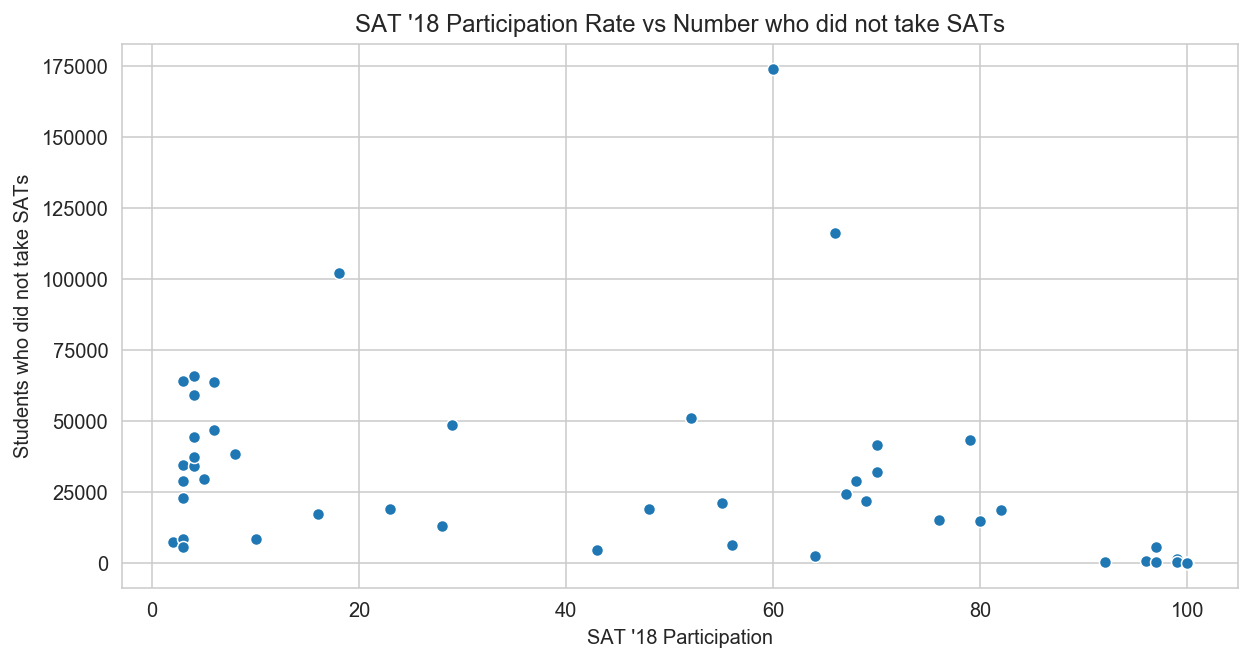

In [32]:
scatplt(final,'s18_Participation','s18_nosatnum',figsize=(10,5),title='SAT \'18 Participation Rate vs Number who did not take SATs',xlabel='SAT \'18 Participation',ylabel='Students who did not take SATs')

In [33]:
final[['s18_Participation','s18_nosatnum']].T

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
s18_Participation,6.0,43.0,29.0,5.0,60.0,100.0,100.0,100.0,92.0,97.0,...,3.0,6.0,66.0,4.0,64.0,68.0,69.0,28.0,3.0,3.0
s18_nosatnum,46853.0,4444.0,48725.0,29570.0,174146.0,0.0,0.0,0.0,432.0,5439.0,...,8442.0,63791.0,116148.0,37158.0,2440.0,28946.0,21795.0,12827.0,64259.0,5645.0


If every state had the same population, we would expect a negative correlation to this graph. However, we notice that no such relation exists, which indicates that financially speaking, the best course of action is not to improve participation rates in the lowest participating states, but rather to focus on states with the highest untapped number of students.<br/>
California is the biggest outlier here, where even though it already has 60% participation in the 2018 SATs, there are still 170 000 students who do not take the test, a multiple of the number from other states. 

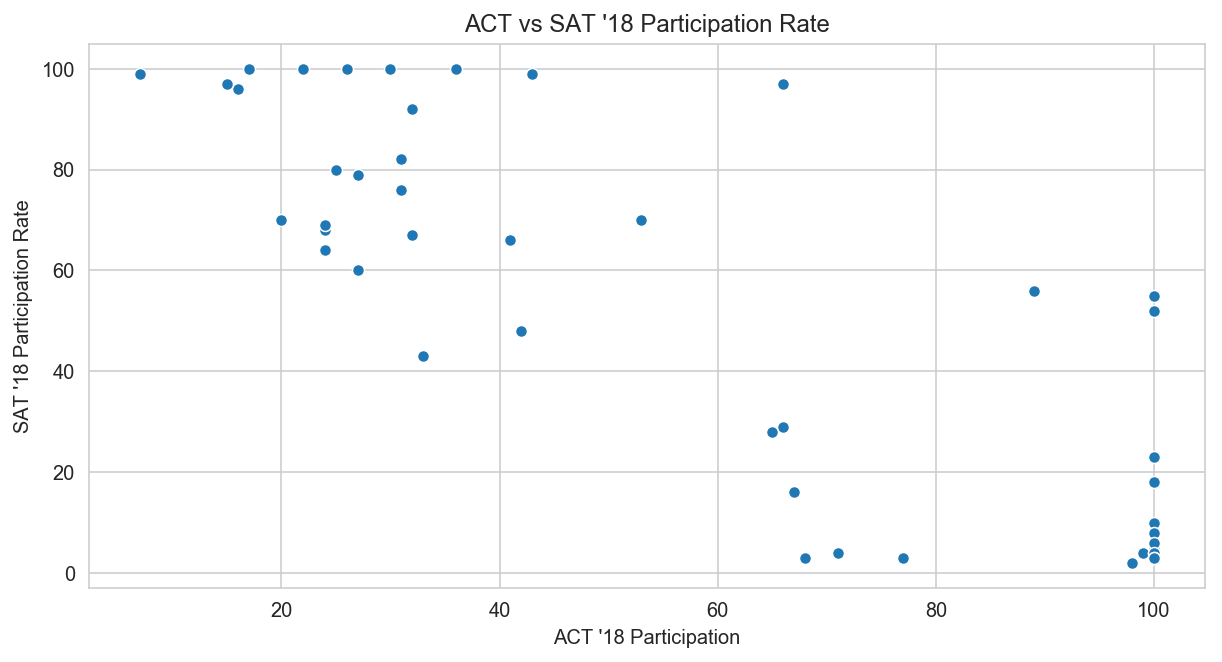

In [36]:
scatplt(final,'a18_Participation','s18_Participation',figsize=(10,5),title='ACT vs SAT \'18 Participation Rate',xlabel='ACT \'18 Participation',ylabel='SAT \'18 Participation Rate')

In [42]:
#Finding sum of 2018 SAT and ACT participation rates
l=[final['s18_Participation'][i]+final['a18_Participation'][i] for i in range(0,51)]
final['18_Participation']=l
final[['18_Participation']].T

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
18_Participation,106,76,95,105,87,130,126,117,124,163,...,80,106,107,104,88,92,93,93,103,103


A negative correlation seems to be present as expected when comparing SAT vs ACT participation rates in 2018.<br/>
It seems to show that schools in a state largely promote either of the tests over the other. The sum of participation rates hover around 100 for most states indicating the tests are mutually exclusive for most students, however, there exist states with percentage sums far above 100 (larger number of students taking both tests), and states with percentage sums below a 100 (some students are not taking either of the tests).<br/>
California seems to be a state with a percentage sum below a 100, indicating the possibility for College Board to entice these students to take the SATs as opposed to trying to wrest students over from taking the ACTs.
<a id=18Part></a>

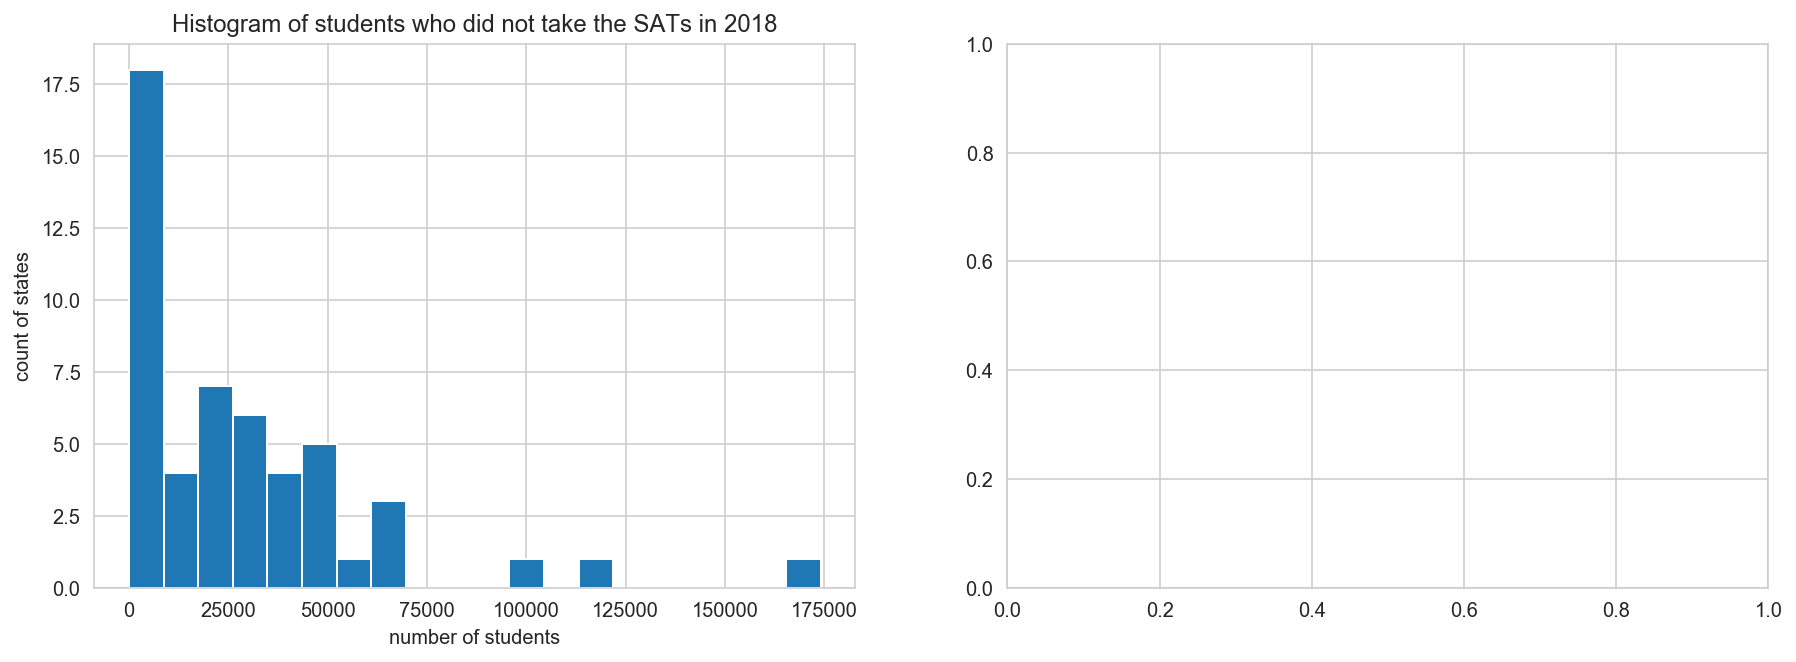

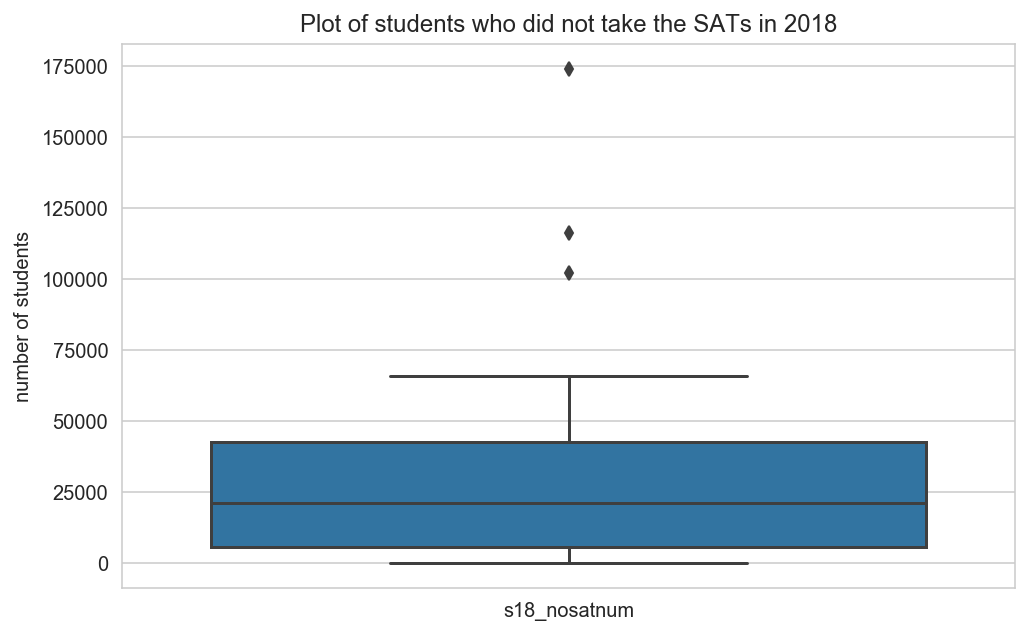

In [70]:
subplot_histograms(final,list_of_columns=['s18_nosatnum'],figsize=(15,5)\
                   ,list_of_titles=['Histogram of students who did not take the SATs in 2018']\
                   ,commonxlabel='number of students',commonylabel='count of states')

boxplt(final,list_of_columns=['s18_nosatnum'],figsize=(8,5),\
        title='Plot of students who did not take the SATs in 2018',\
       xlabel=None,ylabel='number of students')

As mentioned previously, the number of states with a low number of students who did not take the SATs in 2018 is much more than the states with greater numbers. As such it is important to target efforts onto states with more students rather than based on participation rates.

In [43]:
# export altered dataframe
final.to_csv(r'..\data\superfinal.csv')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [132]:
desc=final.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
s17_Participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
s17_English,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
s17_Math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
s17_Total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
a17_Participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
a17_English,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
a17_Math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
a17_Reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
a17_Science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
a17_Composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [131]:
# Add Coefficient of Variation, Skew and Interquartile range to desc
l=[stats.variation(i) for i in final.T.values.tolist()]
m=[stats.skew(i) for i in final.T.values.tolist()]
n=[stats.iqr(i) for i in final.T.values.tolist()]
print(l)
print(m)
print(n)

[0.8775283788664526, 0.07945100707746121, 0.08378274764577327, 0.08132818580482944, 0.4876901933031317, 0.11133945619086945, 0.09264608293485846, 0.09298303153620514, 0.08028612742446319, 0.0929750252033544, 0.807242371191986, 0.07909686390497783, 0.08686491459989155, 0.08264113037456697, 0.5473934284293488, 0.09706318238783157, 0.11541006570472184, 0.09541588085515278, 0.09747104213576015, 0.08675006060320692, 0.2992332651889648, 0.04440473419119881, 0.03878122409409226, 0.04092558285688128, 0.10110708433797415]
[0.33617543925343646, 0.2646065965076702, 0.35421485843432615, 0.30168334986069095, -0.19211796242279808, 0.34220217359811805, 0.3228174361152988, 0.2613779187300745, 0.21233390930923077, 0.3103255637098951, 0.10543708263780055, 0.3482239974174051, 0.41114534286588983, 0.3775473317795179, -0.021265664102340397, 0.273600443365584, 0.3604894183850984, 0.2615541273504424, 0.1953899076147242, 0.16727084253293434, -0.029232709988926728, 0.03921935734741887, 0.1961635066054997, 0.08

In [134]:
test=pd.DataFrame(data={'IQR':n,'CoeffVar':l,'Skew':m},index=final.T.index.tolist())
test

,IQR,CoeffVar,Skew
s17_Participation,62.00,0.877528,0.336175
s17_English,79.50,0.079451,0.264607
s17_Math,75.50,0.083783,0.354215
s17_Total,156.50,0.081328,0.301683
a17_Participation,69.00,0.487690,-0.192118
a17_English,4.30,0.111339,0.342202
a17_Math,3.70,0.092646,0.322817
a17_Reading,3.70,0.092983,0.261378
a17_Science,3.25,0.080286,0.212334
a17_Composite,3.80,0.092975,0.310326


In [135]:
desc=desc.merge(test,left_index=True,right_index=True)
desc

,count,mean,std,min,25%,50%,75%,max,IQR,CoeffVar,Skew
s17_Participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0,62.00,0.877528,0.336175
s17_English,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0,79.50,0.079451,0.264607
s17_Math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0,75.50,0.083783,0.354215
s17_Total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0,156.50,0.081328,0.301683
a17_Participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0,69.00,0.487690,-0.192118
a17_English,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5,4.30,0.111339,0.342202
a17_Math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3,3.70,0.092646,0.322817
a17_Reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0,3.70,0.092983,0.261378
a17_Science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9,3.25,0.080286,0.212334
a17_Composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5,3.80,0.092975,0.310326


Answers:
>We first examine the skew of the graphs. We set +-0.5 as an arbitrary marker of skew to take note of. From all the features in our *final* dataframe, only s17_PSAT stands out.<br/>
The highly negative skew value of s17_PSAT indicates that the distribution is right skewed, and it indicates that many SAT takers in 2017 have taken the PSAT before.<br/><br/>
We next investigate the spread of the distributions. As the skew values of our features are not too high, we can assume normal distributions for our features and use the standard deviation as a measure of spread. We utilize the *Coefficient of Variation* to normalize the deviation to the mean to give us a scaled measure of spread. As before, we set an arbitrary value of 0.5 as a marker of spread values to take note of. What we observe is that the spread of test values are relatively small, with the spread of participation rates being significantly bigger. We observe that SAT participation rates are highly spread amongst the states.<br/><br/>
For measures of central tendency, we notice that ACT participation rates are higher than SAT rates, though the ACT rates have declined and the SAT rates have improved. Test scores are relatively similar year on year.

In [53]:
#Using mask to find outliers in table one standard dev away from the mean of the feature
final.mask((final>final.mean()-final.std(ddof=0))&(final<final.mean()+final.std(ddof=0)))

,s17_Participation,s17_English,s17_Math,s17_Total,a17_Participation,a17_English,a17_Math,a17_Reading,a17_Science,a17_Composite,...,a18_Math,a18_Reading,a18_Science,p17_Participation,p17_English,p17_Math,p17_Total,s17_PSAT,s18_nosatnum,18_Participation
State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,100.0,NaN,18.4,19.7,19.4,19.2,...,18.3,19.6,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,76.0
Arizona,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,NaN,NaN,...,NaN,19.5,19.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,3.0,NaN,NaN,NaN,100.0,NaN,19.0,19.7,19.5,19.4,...,18.9,19.7,19.4,27.0,560.0,NaN,1091.0,NaN,NaN,NaN
California,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,501.0,492.0,994.0,NaN,174146.0,87.0
Colorado,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,23.2,24.4,23.5,23.0,557.0,542.0,1099.0,NaN,NaN,130.0
Connecticut,100.0,NaN,NaN,NaN,31.0,25.5,24.6,25.6,24.6,25.2,...,24.8,26.1,24.9,NaN,NaN,494.0,NaN,92.0,NaN,NaN
Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1,...,NaN,24.5,23.4,NaN,NaN,NaN,NaN,91.0,NaN,NaN
District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2,...,NaN,24.4,NaN,NaN,480.0,471.0,951.0,NaN,NaN,NaN


>Above is a table displaying only the outliers one standard deviation away from the mean in the table.<br/>
What is most readily noticeable is how states with the highest participation rates perform the worst in tests and states with the lowest rates perform the best.<br/><br/>
Another interesting point to note, is that some of the states with the lowest SAT participation rates also have the smallest number of students who did not take the SATs (indicating a small population size in the state in the first place).<br/><br/>
As such, we should focus our efforts on raising participation rates in states with large numbers of students who do not intend to take the SATs. These three states will be California, Ohio, and Texas. 

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
>Not really. Based on the [histograms](#histo2) plotted in the above sections, a clear normal distribution is not observed. This is likely due to the fact that with only 51 states worth of data to work with, *n =* 51 and the clarity of the distribution is still not visible. To check if the test scores are normally distributed, we would need the scores from individual students rather than binned by state which would increase our *n* manifold.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
>Traces of a normal distribution can be seen in the Math and Reading [histograms](#histo2); definitely not for rates however.<br/>
The histogram of rates is either highly skewed left or skewed right due to the 0 or 100% modal nature of statewide assessments. This implies that our measures of central tendency are highly affected by the modes in the distribution and we have to use such estimates with caution.<br/><br/>
In the Math and Reading histograms, assuming that a normal distribution will be obtained if our sample size is increased (sampling individuals rather than states), we only have to check the skew of these distributions (which we have found not to be significant) to determine if our estimates can be considered to be accurate. (They should be)

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

Answer:
>It will only make sense if our inferences have to do with participation **rates** rather than individual numbers as states have highly variant population sizes.<br/>
Another consideration would be the intersection of our SAT and ACT participant sets. Unless the two sets are mutually exclusive (we have found they are not, evidenced by the 100+% sum of participation rates), there will exist individuals who will take both tests which throws another variable into the equation. SAT and ACT participation rates will not be good predictors of each other.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
>Definitely not. Firstly, the scoring systems are different, with the ACT scoring being from 1-36 and the SATs from 200-800.<br/>
To compare these scores, they should be normalized to similar ranges before comparison.<br/>
The next factor to consider is the pragmatic use of this comparison. For all intents and purposes, a comparison should be used to determine which test is better for college acceptance, and to do that, we have to better understand how colleges benchmark ACT and SAT scores and the differences in the benchmarking.<br/>
Therefore, even normalizing the scores with the *Z/T*-scores might not be a meaningful comparison if fundamentally the two tests are viewed by colleges differently.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [65]:
#Two-tailed test for difference in SAT '17 and '18 Participation Rates:
stats.ttest_ind(final['s17_Participation'],final['s18_Participation'])

Ttest_indResult(statistic=-0.9396299045734346, pvalue=0.3496715691509279)

Where the null hypothesis $H_0$ is 'the difference between SAT '17 and '18 Participation Rates is 0', we conducted a two-tailed t-test in the cell above.<br/>
The result is that there is a 34.9% probability that participation rates differ equal to or more than the amount observed in our sample assuming that our null hypothesis is true.<br/>
As such, we cannot reject the null hypothesis as our $p$-value has not even reached the significance level of 0.05<br/>
(i.e. the difference in Participation Rates year-on-year is not really statistically significant).<br/>
This method of analysis conceals the fact that [there was a 25% net increase in participation of individuals](https://reports.collegeboard.org/sat-suite-program-results/class-2018-results).

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

>The 3 states I will investigate are (1) Colorado, (2) Florida, and (3) Iowa.<br/>
Colorado had the [greatest change in participation rates for both SAT and ACT from 2017 to 2018.](#Colorado)<br/>
Florida has the [greatest sum of participation rates](#18Part) in 2018 and Iowa has the least.<br/><br/>
The reason Colorado had such a great change in participation rates was a change in statewide assessment policy [switching](https://www.testive.com/colorado-sat-change-2017/) from the [ACT to SAT in 2017](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/). In 2015, [a bill was passed](http://extras.denverpost.com/app/bill-tracker/bills/2015a/hb_15-1323/) that mandated statewide assessment which was first conducted as the ACT, then switched to the SAT. The SATs are also now [viewed more favourably](https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html) due to a redesign of the curriculum and initiatives such as 'SAT School Day' which helped the SAT win over states like Colorado.<br/><br/>
The high participation rate in Florida for both the SAT and ACTs is interesting considering certain factors. Firstly, Florida [ranks low](https://www.governing.com/gov-data/education-data/state-education-spending-per-pupil-data.html) on state-education funding indicating lesser influence on the part of the state. The people of Florida are also [not ranked highly](https://en.wikipedia.org/wiki/List_of_U.S._states_by_educational_attainment#cite_note-datasource-1) in terms of educational attainment and by inference, her people would not be the type to participate in optional tests. It seems that Florida's high participation rate is due to the fact that [*'Florida students seeking admission to any of Florida’s state universities need to submit either an ACT or SAT score'*](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html).<br/>
Florida's increase in SAT participation is also due to the aforementioned ['SAT School Day' initiative](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html), and also due to a [partnership with Khan academy](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html).<br/><br/>
Iowa is also interesting, as in spite of its low participation rate, the [proportion of college going seniors is close to the US national average](http://publications.iowa.gov/28716/1/Condition%20of%20Higher%20Education%20in%20Iowa%202018.pdf).Iowa's colleges [do require either the SAT or ACTs](https://www.prepscholar.com/sat/s/colleges/University-of-Iowa-admission-requirements), and this indicates that only college-bound seniors choose to take the tests with the other graduating students not even attempting application to the colleges. It seems that there is also a [precedent for Iowa's low participation rates since 2007](https://wcfcourier.com/news/breaking_news/iowa-s-sat-scores-rank-high-nationally-participation-low/article_f59bcf7f-df03-53a7-bb6e-55a0caac633f.html).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

*********************************************************************************************************
Based on all the data exploration, I would state that there are very few predictors of participation. <br/>
My recommendation would be for the College Board to continue with their successful efforts in the following avenues: <br/>
- Convincing states that the revamped SATs are best-aligned to the high school curriculum, to get statewide assessment contracts (ala Colorado)
- Implementing 'SAT School Days' in as many state districts as possible (ala Florida), and
- To provide more value-added services like pairing up with Khan Academy to provide free online review lessons.<br/>

From the data, the most useful recommendation to be given would be for the College Board to promote the PSAT, as the PSAT participation shows a 0.4 positive correlation with SAT participation when students reach grade 11 or 12.

------------------------------------------------------------------------------------------------------------------
I wish to have more data on
- Students who took both the SAT and ACTs,
- PSAT and SAT data **before** the 2016 change in assessment (to determine if PSAT is a good predictor of SAT participation)
- 'SAT School Day' data (number of schools involved in different states)